In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cvxopt import matrix, solvers
from tqdm import tqdm
from matplotlib.colors import ListedColormap
from pandas import *

### Question 1

     0     1     2     3    4     5     6    7    8    9
0  0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0
1  0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0
2  0.0   0.0   0.0   0.0  0.0 -10.0 -10.0  0.0  0.0  0.0
3  0.0   0.0   0.0   0.0  0.0 -10.0 -10.0  0.0  0.0  0.0
4  0.0 -10.0 -10.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0
5  0.0 -10.0 -10.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0
6  0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0
7  0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0
8  0.0   0.0 -10.0 -10.0  0.0   0.0   0.0  0.0  0.0  0.0
9  0.0   0.0 -10.0 -10.0  0.0   0.0   0.0  0.0  0.0  1.0


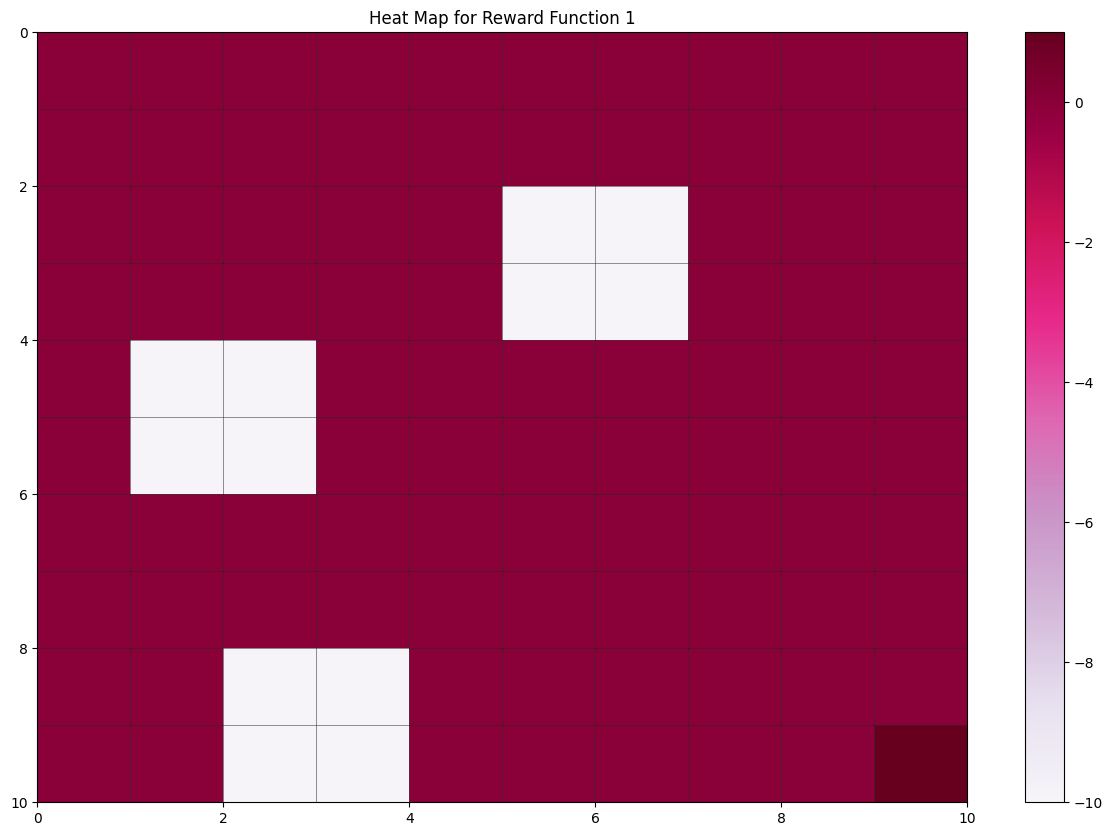

     0    1    2    3      4      5      6      7      8     9
0  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0   0.0
1  0.0  0.0  0.0  0.0 -100.0 -100.0 -100.0    0.0    0.0   0.0
2  0.0  0.0  0.0  0.0 -100.0    0.0 -100.0    0.0    0.0   0.0
3  0.0  0.0  0.0  0.0 -100.0    0.0 -100.0 -100.0 -100.0   0.0
4  0.0  0.0  0.0  0.0 -100.0    0.0    0.0    0.0 -100.0   0.0
5  0.0  0.0  0.0  0.0 -100.0    0.0    0.0    0.0 -100.0   0.0
6  0.0  0.0  0.0  0.0 -100.0    0.0    0.0    0.0 -100.0   0.0
7  0.0  0.0  0.0  0.0    0.0    0.0 -100.0 -100.0 -100.0   0.0
8  0.0  0.0  0.0  0.0    0.0    0.0 -100.0    0.0    0.0   0.0
9  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0  10.0


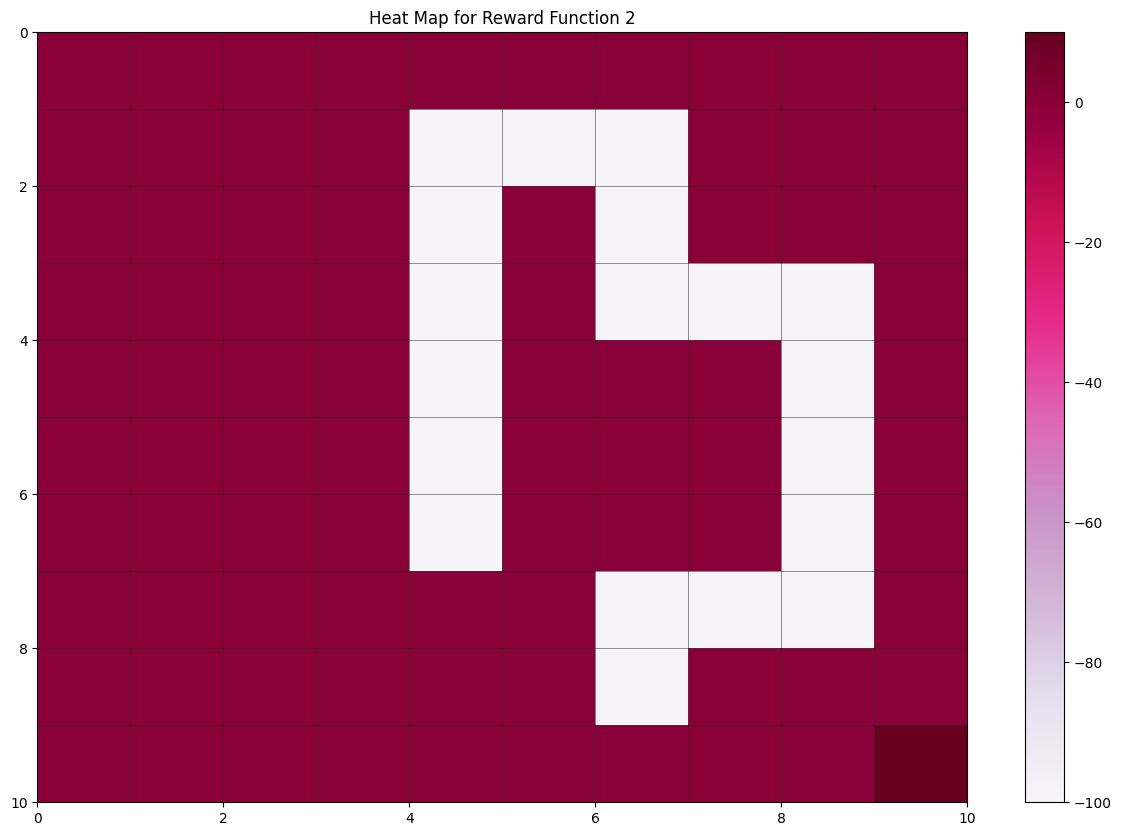

In [2]:
#Define function
reward_1 = np.zeros((10,10))
reward_1[9,9] = 1.0
reward_1[2:4,5:7] = -10 
reward_1[4:6,1:3] = -10
reward_1[8:,2:4] = -10

print(DataFrame(reward_1))

#Heatmap
plt.figure(figsize=(15,10))
plt.pcolor(reward_1, cmap = "PuRd",edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 1")
plt.savefig("Q1a.png",dpi=300,bbox_inches='tight')
plt.show()


# RF 2

#Define Function
reward_2 = np.zeros((10,10))
reward_2[1:7,4] = -100
reward_2[1,4:7] = -100
reward_2[1:4,6] = -100
reward_2[3,6:9] = -100
reward_2[3:8,8] = -100
reward_2[7:9,6] = -100
reward_2[7,6:9] = -100
reward_2[9,9] = 10

print(DataFrame(reward_2))

#Heatmap
plt.figure(figsize=(15,10))
plt.pcolor(reward_2, cmap = "PuRd",edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('Heat Map for Reward Function 2')
plt.savefig("Q1b.png",dpi=300,bbox_inches='tight')
plt.show()

### Question 2

In [3]:
# Q2
# Transition Functions
def transition_probability(w):
    trans_prob_left= np.zeros(shape=(100,100))
    trans_prob_right= np.zeros(shape=(100,100))
    trans_prob_up= np.zeros(shape=(100,100))
    trans_prob_down= np.zeros(shape=(100,100))
    
#left
    for i in range(0,100):
        if(i%10==0):
            trans_prob_left[i][i]+=w/4
        else:
            trans_prob_left[i][i-1]=w/4
        if(i-10<0):
            trans_prob_left[i][i]+=w/4
        else:
            trans_prob_left[i][i-10]=1-w+w/4
        if(i+10>99):
            trans_prob_left[i][i]+=w/4
        else:
            trans_prob_left[i][i+10]=w/4
        if((i+1)%10==0):
            trans_prob_left[i][i]+=w/4
        else:
            trans_prob_left[i][i+1]=w/4
        if(i-10<0):                      
            trans_prob_left[i][i]+=1-w
#Right
    for i in range(0,100):
        if(i%10==0):
            trans_prob_right[i][i]+=w/4
        else:
            trans_prob_right[i][i-1]=w/4
        if(i-10<0):
            trans_prob_right[i][i]+=w/4
        else:
            trans_prob_right[i][i-10]=w/4
        if(i+10>99):
            trans_prob_right[i][i]+=w/4
        else:
            trans_prob_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            trans_prob_right[i][i]+=w/4
        else:
            trans_prob_right[i][i+1]=w/4
        if(i+10>99):                      
            trans_prob_right[i][i]+=1-w
#Up
    for i in range(0,100):
        if(i%10==0):
            trans_prob_up[i][i]+=w/4
        else:
            trans_prob_up[i][i-1]=1-w+w/4
        if(i-10<0):
            trans_prob_up[i][i]+=w/4
        else:
            trans_prob_up[i][i-10]=w/4
        if(i+10>99):
            trans_prob_up[i][i]+=w/4
        else:
            trans_prob_up[i][i+10]=w/4
        if((i+1)%10==0):
            trans_prob_up[i][i]+=w/4
        else:
            trans_prob_up[i][i+1]=w/4
        if(i%10==0):                     
            trans_prob_up[i][i]+=1-w
#Down
    for i in range(0,100):
        if(i%10==0):
            trans_prob_down[i][i]+=w/4
        else:
            trans_prob_down[i][i-1]=w/4
        if(i-10<0):
            trans_prob_down[i][i]+=w/4
        else:
            trans_prob_down[i][i-10]=w/4
        if(i+10>99):
            trans_prob_down[i][i]+=w/4
        else:
            trans_prob_down[i][i+10]=w/4
        if((i+1)%10==0):
            trans_prob_down[i][i]+=w/4
        else:
            trans_prob_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            trans_prob_down[i][i]+=1-w
#Stacking into single matrix
    P_matrix = np.stack((trans_prob_left, trans_prob_right, trans_prob_up, trans_prob_down))
    return P_matrix, trans_prob_up, trans_prob_down, trans_prob_left, trans_prob_right

# Value Function Iteration (Intermediate)
def get_inter_value(num_states,P_matrix,reward_function,epsilon,gamma):
    V=np.zeros((100,))
    delta=np.inf
    reward_function = (reward_function.T).ravel() # because the state space is column first. 
    N=0
    all_delta_array=[]
    intermediate_delta_array = []
    intermediate_V=[]
    step_number = []
    while delta>epsilon:
        N=N+1
        v_next=np.amax(np.matmul(P_matrix,reward_function+gamma*V), axis=0)
        delta=np.amax(np.abs(v_next-V))
        all_delta_array.append(delta)
        V=v_next
        if N%4==0:
            step_number.append(N)
            intermediate_delta_array.append(delta)
            intermediate_V.append(np.transpose(V.reshape(10,10)))
    print("Number of steps for convergence: ", N)
    print("Number of intermediate steps captured: ", len(intermediate_V))
    return V, intermediate_V, all_delta_array, intermediate_delta_array, step_number

# Policy Function
def get_policy(num_states,P_matrix,reward_function,epsilon=0.01,gamma=0.8):
    V=np.zeros((100,))
    delta=np.inf
    reward_function = (reward_function.T).ravel() # because the state space is column first. 
    while delta>epsilon:
        v_next=np.amax(np.matmul(P_matrix,reward_function+gamma*V), axis=0)
        delta=np.amax(np.abs(v_next-V))
        V=v_next
    policy=np.argmax(np.matmul(P_matrix,reward_function+gamma*V), axis=0)
    return policy

Number of steps for convergence:  22
Number of intermediate steps captured:  5


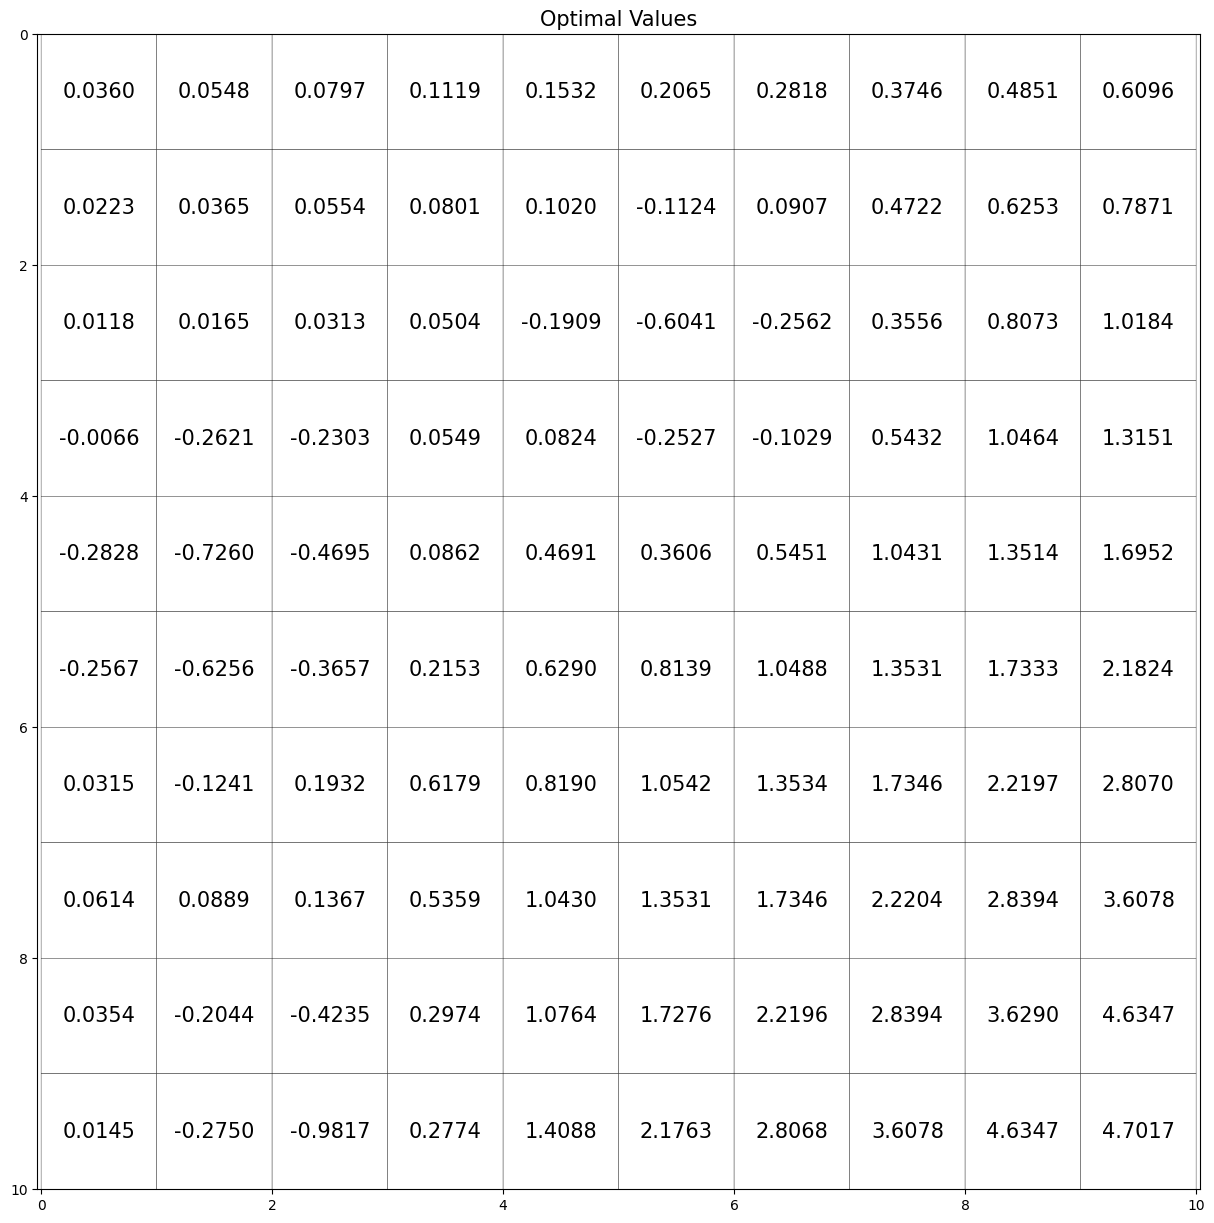

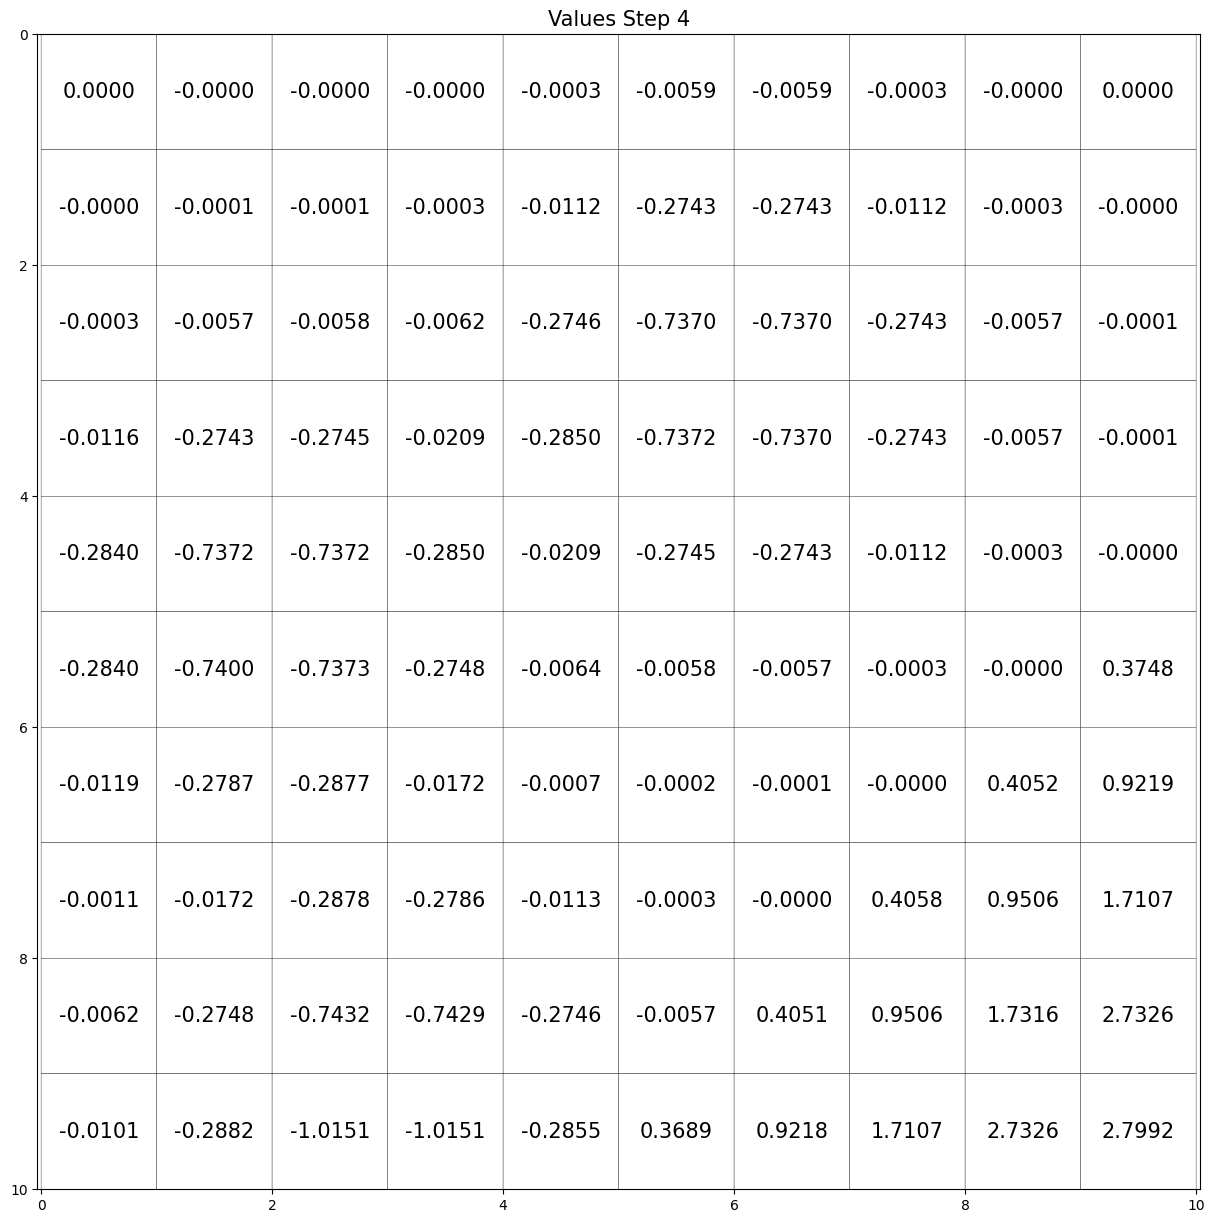

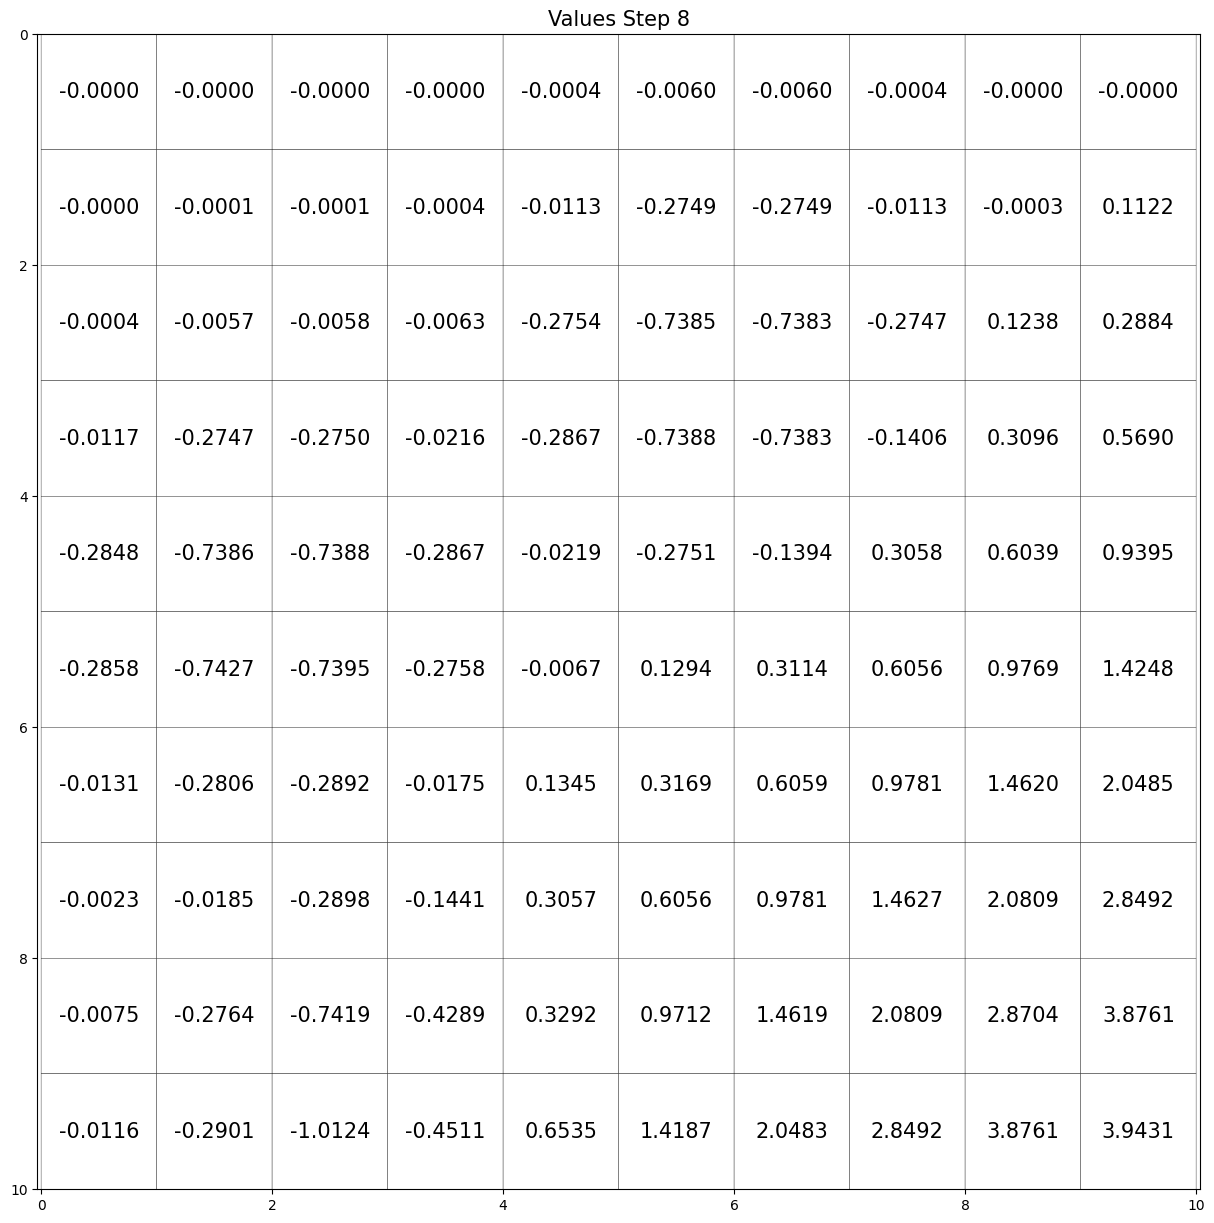

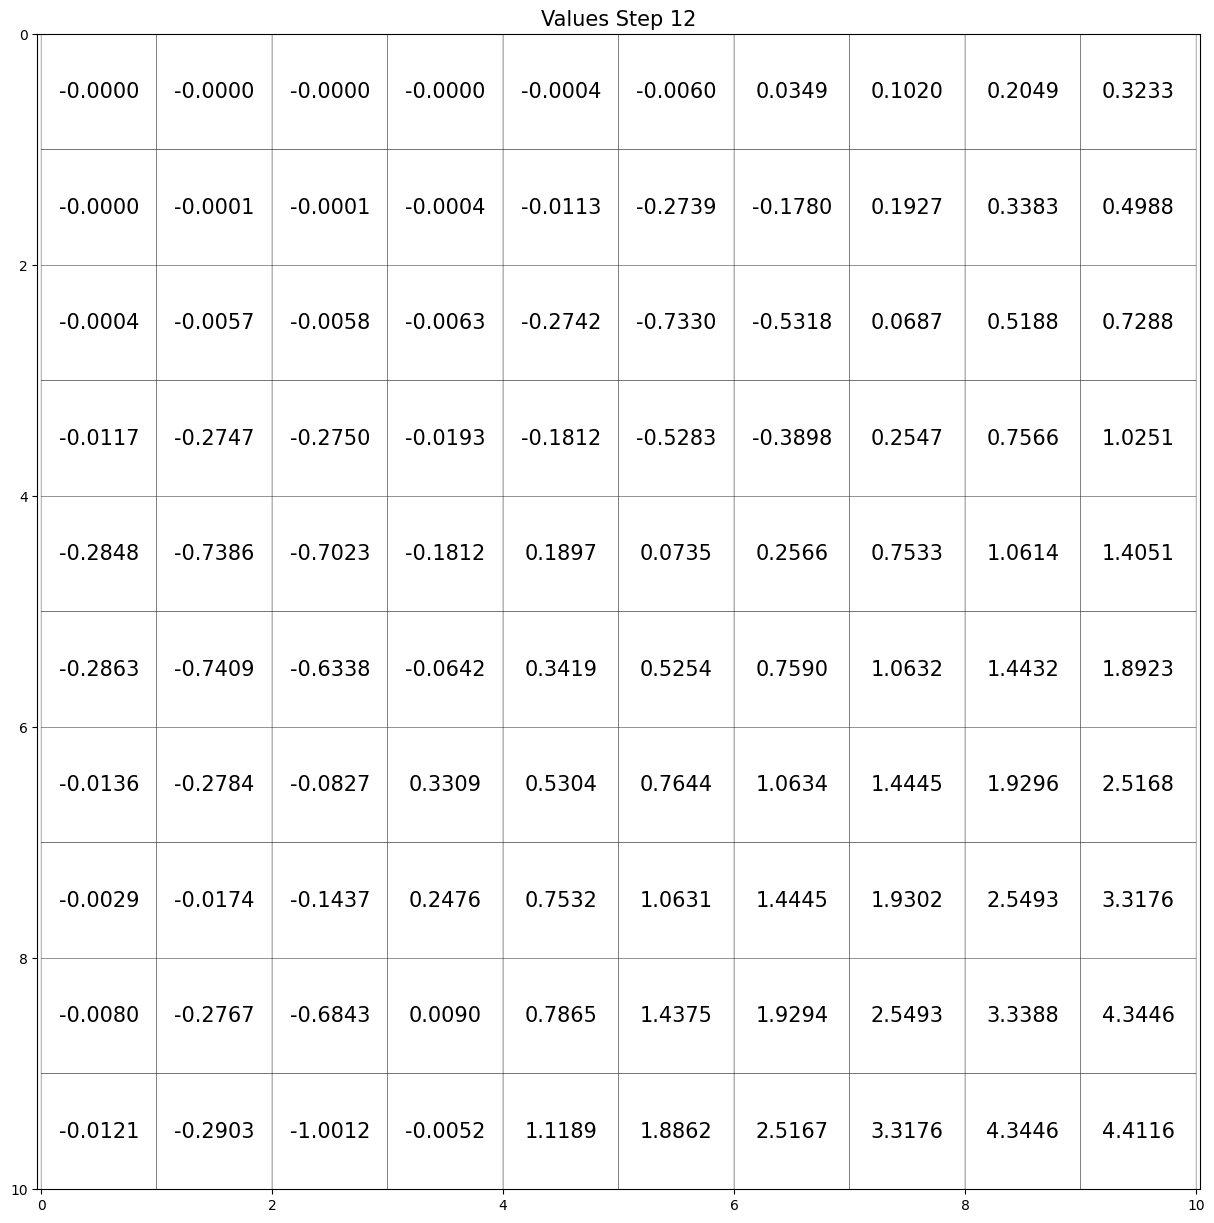

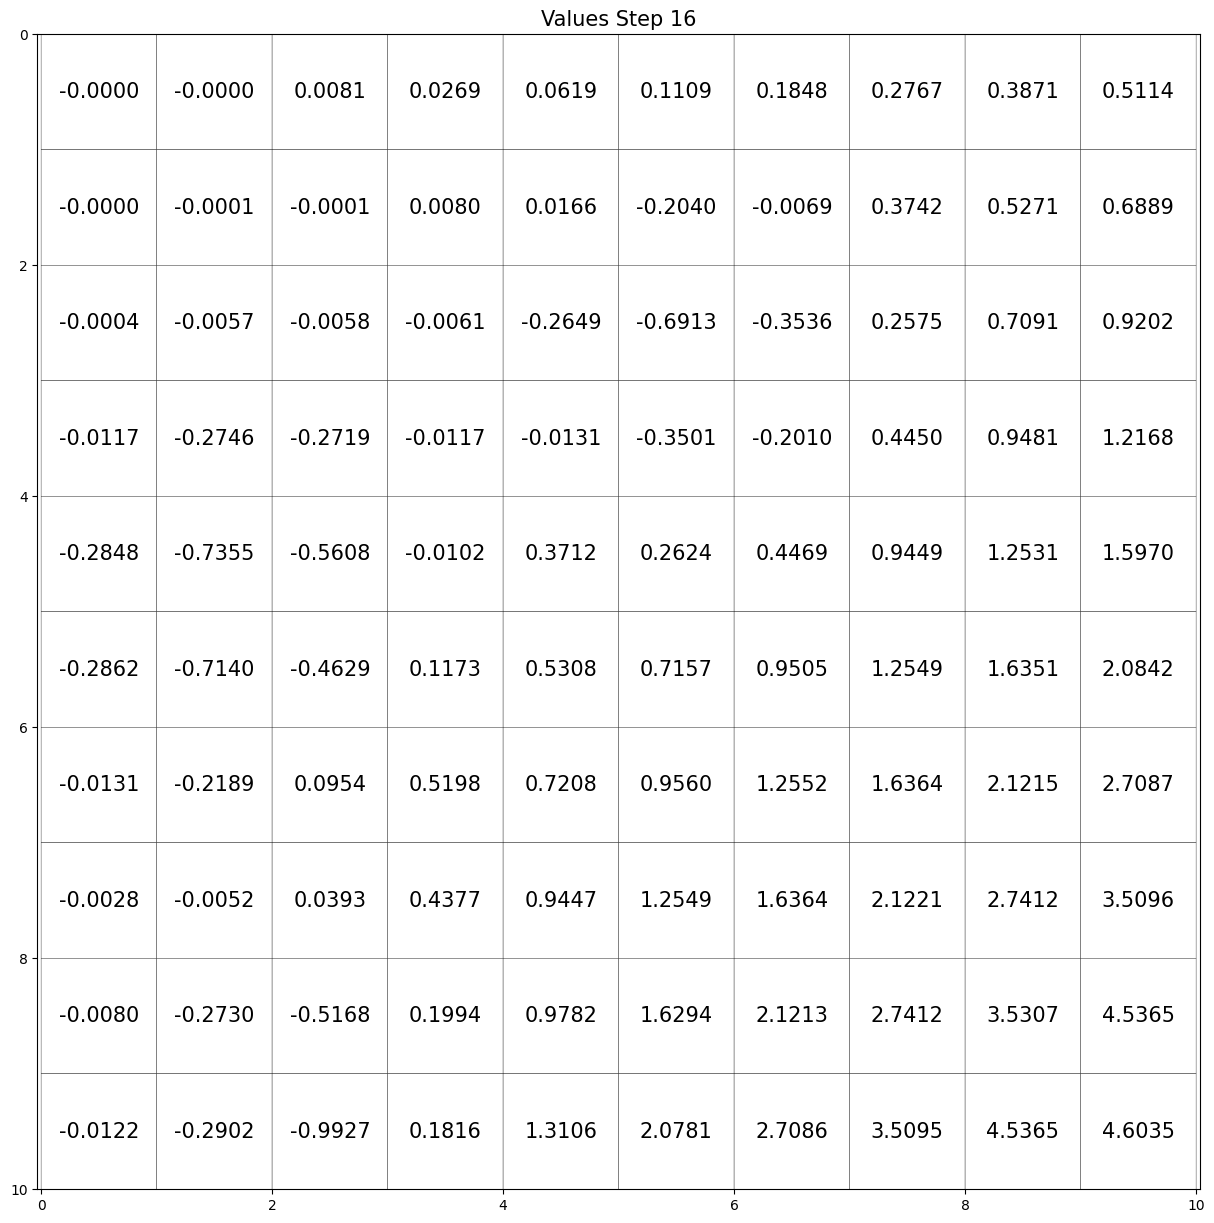

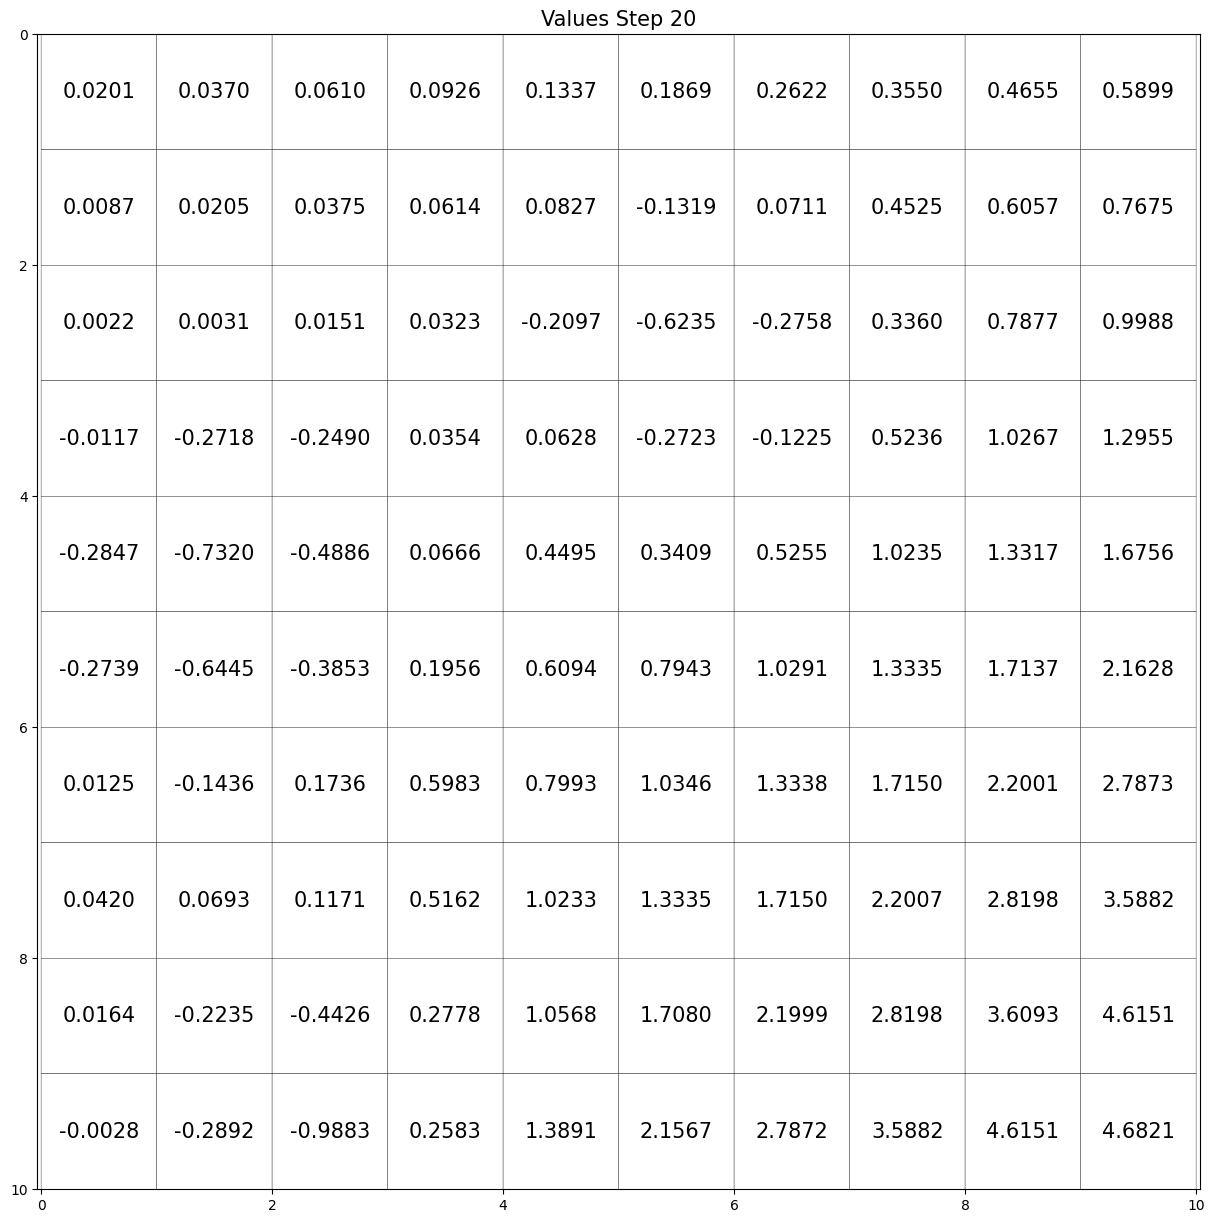

In [4]:
#Intermediate Value

#Parameters
num_states=100
gamma=0.8
w=0.1
epsilon=0.01
reward_function = reward_1
P_matrix, _, _, _, _ = transition_probability(w)

#Calculating value
V,intermediate_V,delta_array,intermediate_delta_array,step_number= get_inter_value(num_states,P_matrix,reward_function,epsilon,gamma)
optimal_V=np.transpose(V.reshape(10,10))
# print(optimal_V)
#Optimal
plt.figure(figsize=(15,15))
plt.pcolor(optimal_V, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')     
plt.title("Optimal Values", fontsize=15)
for y in range(optimal_V.shape[0]):
    for x in range(optimal_V.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % optimal_V[y, x],
            horizontalalignment='center',
            verticalalignment='center', fontsize=15)
plt.savefig("Q2a.png",dpi=300,bbox_inches='tight')
#Intermediate Steps

#Step 4
plt.figure(figsize=(15,15))
plt.pcolor(intermediate_V[0], cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')     
plt.title("Values Step 4", fontsize=15)
for y in range(intermediate_V[0].shape[0]):
    for x in range(intermediate_V[0].shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % intermediate_V[0][y, x],
            horizontalalignment='center',
            verticalalignment='center', fontsize=15)
plt.savefig("Q2b.png",dpi=300,bbox_inches='tight')
plt.show()

#Step 8
plt.figure(figsize=(15,15))
plt.pcolor(intermediate_V[1], cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')     
plt.title("Values Step 8", fontsize=15)
for y in range(intermediate_V[1].shape[0]):
    for x in range(intermediate_V[1].shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % intermediate_V[1][y, x],
            horizontalalignment='center',
            verticalalignment='center', fontsize=15)
plt.savefig("Q2c.png",dpi=300,bbox_inches='tight')
plt.show()

#Step 12
plt.figure(figsize=(15,15))
plt.pcolor(intermediate_V[2], cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')     
plt.title("Values Step 12", fontsize=15)
for y in range(intermediate_V[2].shape[0]):
    for x in range(intermediate_V[2].shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % intermediate_V[2][y, x],
            horizontalalignment='center',
            verticalalignment='center', fontsize=15)
plt.savefig("Q2d.png",dpi=300,bbox_inches='tight')        
plt.show()

#Step 16
plt.figure(figsize=(15,15))
plt.pcolor(intermediate_V[3], cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')     
plt.title("Values Step 16", fontsize=15)
for y in range(intermediate_V[3].shape[0]):
    for x in range(intermediate_V[3].shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % intermediate_V[3][y, x],
            horizontalalignment='center',
            verticalalignment='center', fontsize=15)
plt.savefig("Q2e.png",dpi=300,bbox_inches='tight')        
plt.show()

#Step 20
plt.figure(figsize=(15,15))
plt.pcolor(intermediate_V[4], cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')     
plt.title("Values Step 20", fontsize=15)
for y in range(intermediate_V[4].shape[0]):
    for x in range(intermediate_V[4].shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % intermediate_V[4][y, x],
            horizontalalignment='center',
            verticalalignment='center', fontsize=15)
plt.savefig("Q2f.png",dpi=300,bbox_inches='tight')        
plt.show()

### Question 3

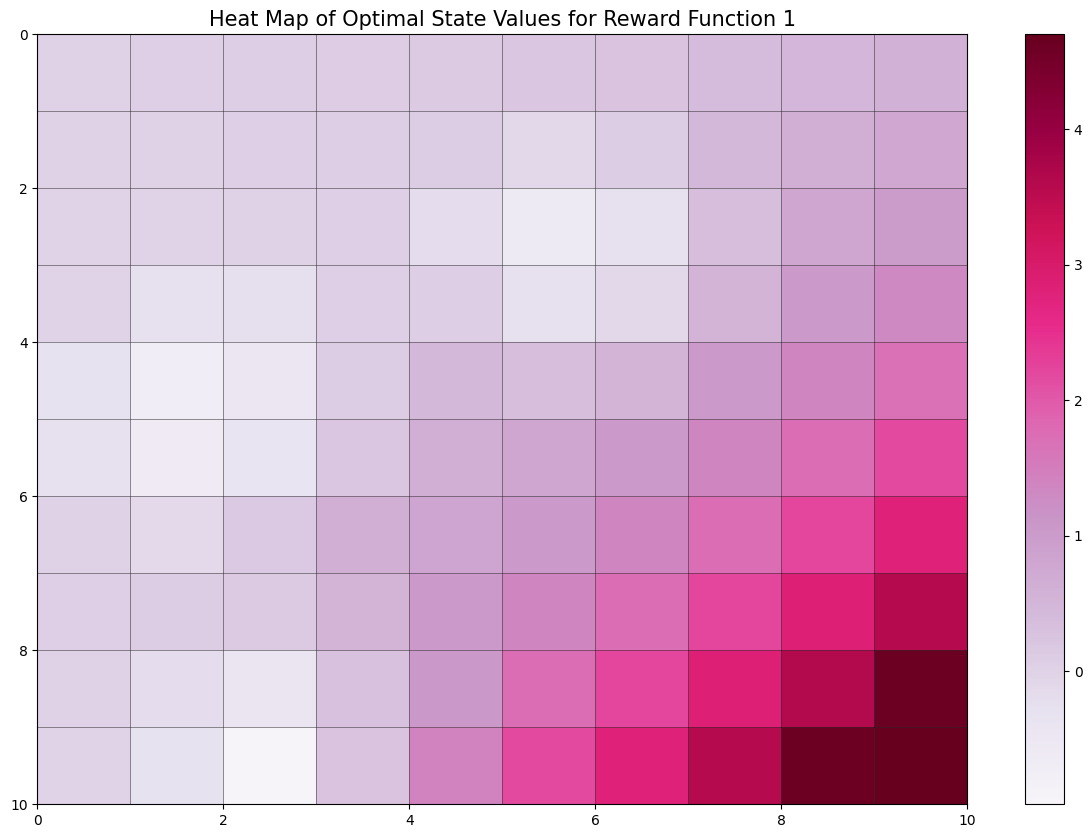

In [5]:
#Heatmap of optimal
plt.figure(figsize=(15,10))
plt.pcolor(optimal_V, cmap = "PuRd",edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 1",fontsize=15)
plt.savefig("Q3.png",dpi=300,bbox_inches='tight')
plt.show()

### Question 5

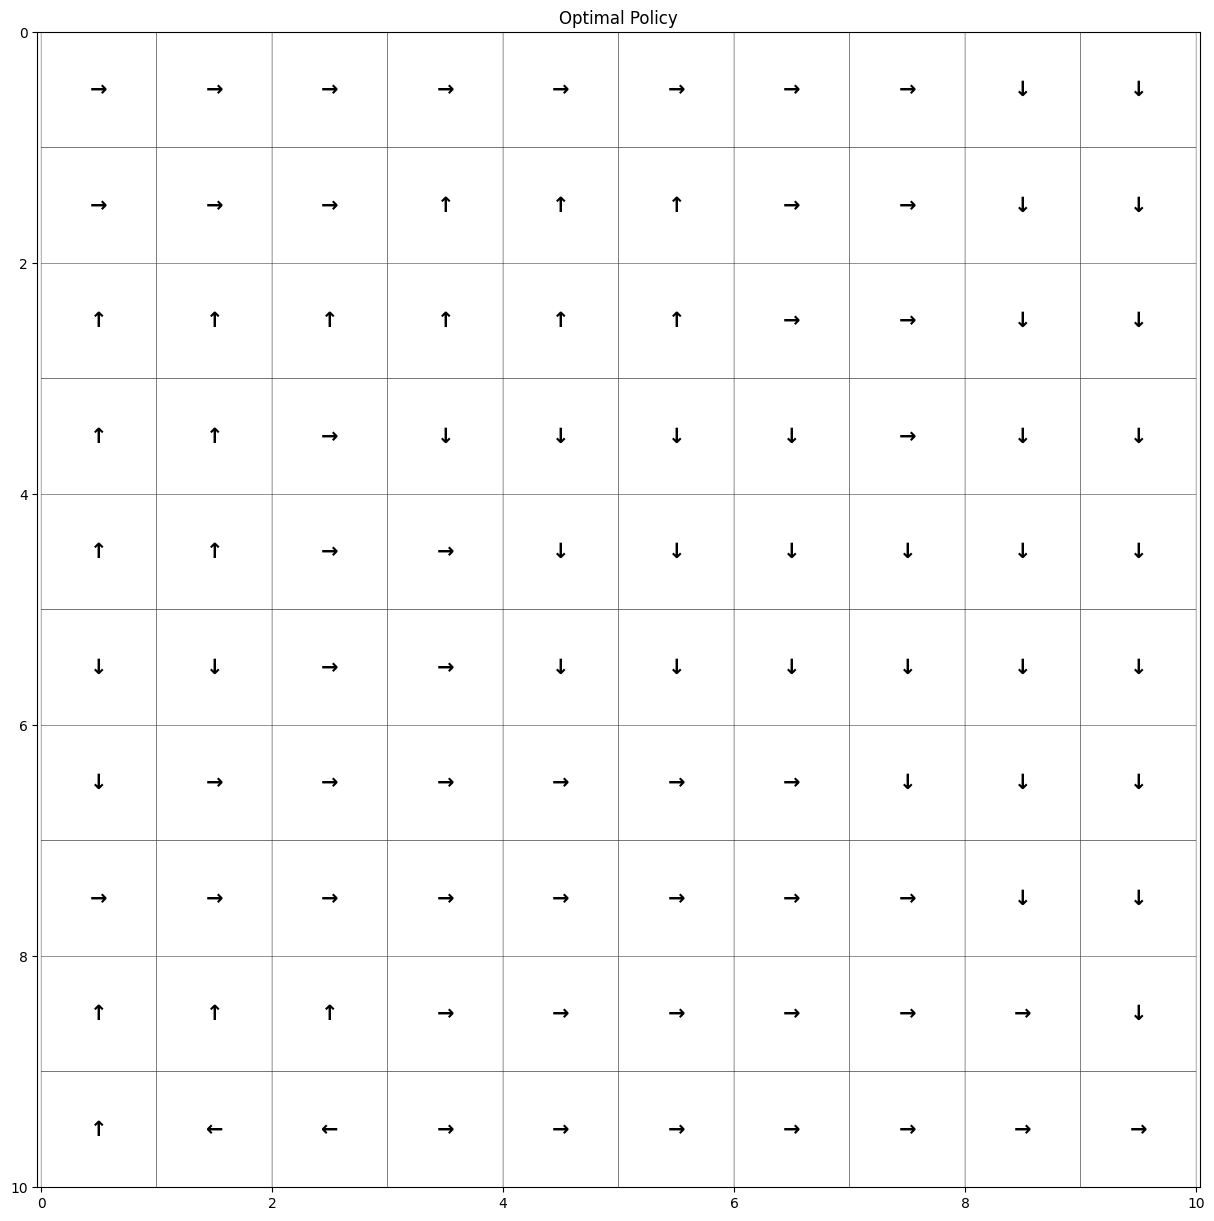

In [6]:
#Computing Policy
policy=get_policy(num_states,P_matrix,reward_function,epsilon,gamma)
optimal_policy=np.transpose(policy.reshape(10,10))

#Plotting Policy
arrow_matrix=np.chararray((optimal_policy.shape[0], optimal_policy.shape[1]),unicode=True)
for r in range(optimal_policy.shape[0]):
    for c in range(optimal_policy.shape[1]):
        # If policy says go left
        if optimal_policy[r][c] == 0:
            arrow_matrix[r][c] = u'\u2190'
        # If policy says go right
        elif optimal_policy[r][c] == 1:
            arrow_matrix[r][c] = u'\u2192'
        # If policy says go up
        elif optimal_policy[r][c] == 2:
            arrow_matrix[r][c] =u'\u2191'
        # If policy says go down
        elif optimal_policy[r][c] == 3:
            arrow_matrix[r][c] = u'\u2193'
    
plt.figure(figsize=(15,15))
plt.pcolor(optimal_policy, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy")
for y in range(optimal_policy.shape[0]):
    for x in range(optimal_policy.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.savefig("Q5.png",dpi=300,bbox_inches='tight')
plt.show()

### Question 6

Number of steps for convergence:  32
Number of intermediate steps captured:  8


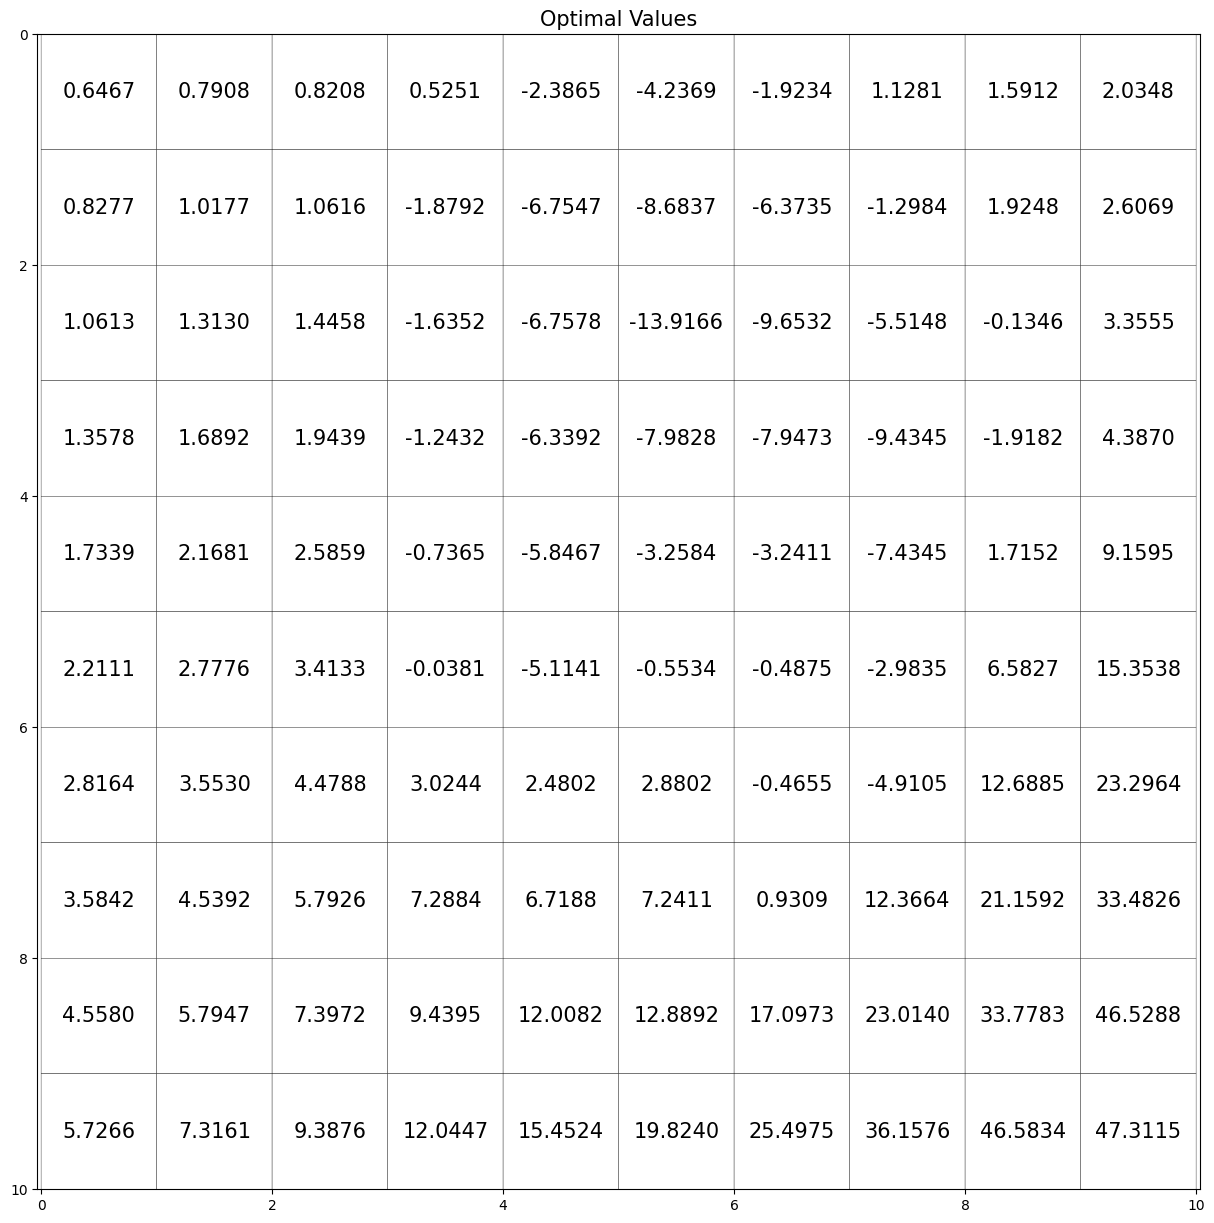

In [7]:
#Parameters
num_states=100
gamma=0.8
w=0.1
epsilon=0.01
reward_function = reward_2
P_matrix,_,_,_,_ = transition_probability(w)

#Calculating value
V,intermediate_V,delta_array,intermediate_delta_array,step_number= get_inter_value(num_states,P_matrix,reward_function,epsilon,gamma)
optimal_V=np.transpose(V.reshape(10,10))

# Q6
#Optimal
plt.figure(figsize=(15,15))
plt.pcolor(optimal_V, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')     
plt.title("Optimal Values", fontsize=15)
for y in range(optimal_V.shape[0]):
    for x in range(optimal_V.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % optimal_V[y, x],
            horizontalalignment='center',
            verticalalignment='center', fontsize=15)
plt.savefig("Q6.png",dpi=300,bbox_inches='tight')

### Question 7

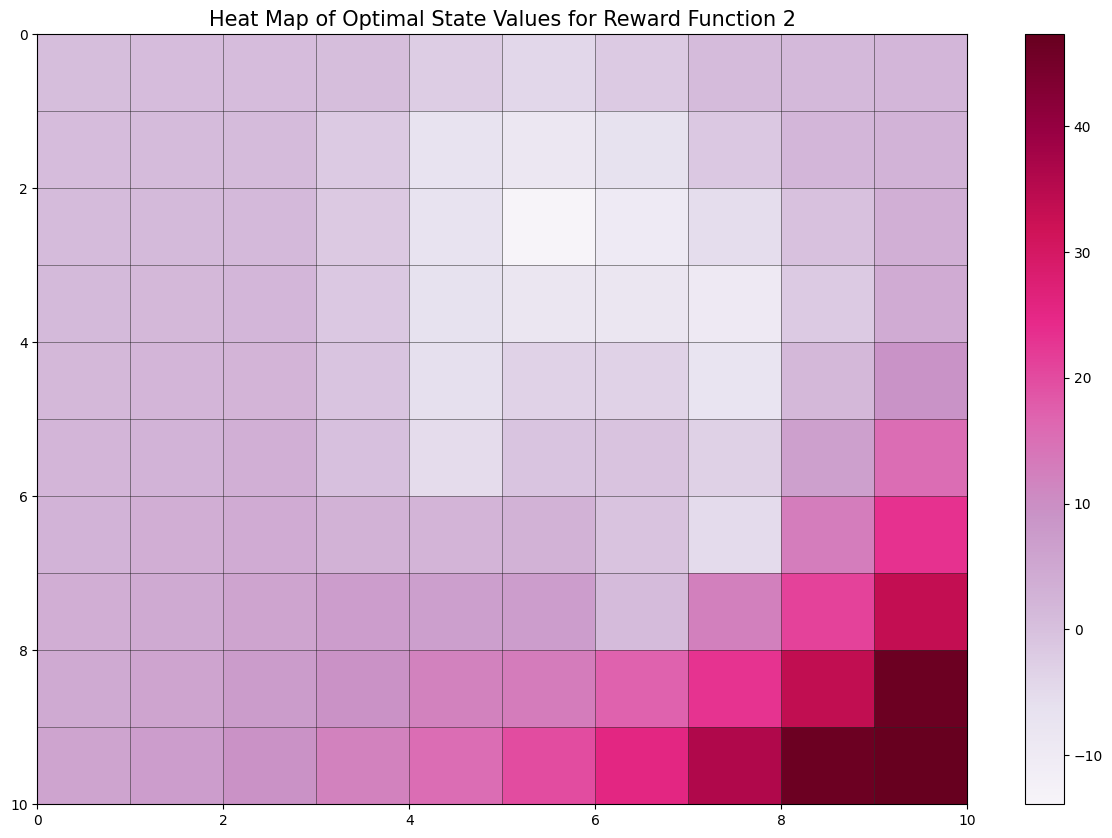

In [8]:
# Q7
#Heatmap of optimal
plt.figure(figsize=(15,10))
plt.pcolor(optimal_V, cmap = "PuRd",edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Reward Function 2",fontsize=15)
plt.savefig("Q7.png",dpi=300,bbox_inches='tight')
plt.show()

### Question 8

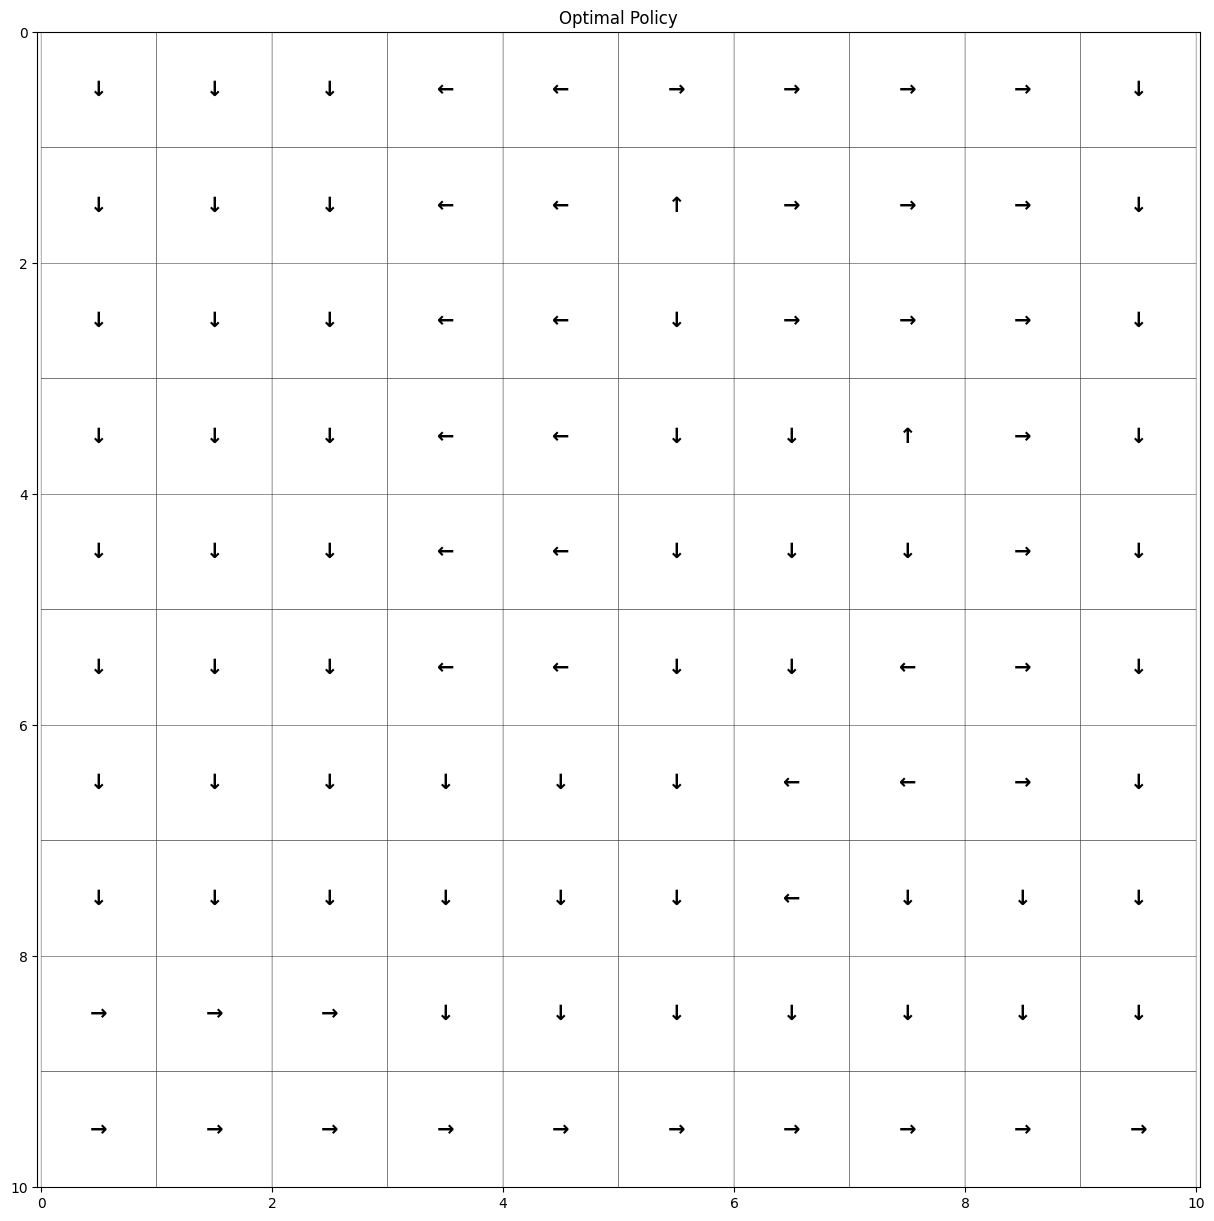

In [9]:
#Optimal Policy
policy=get_policy(num_states,P_matrix,reward_function,epsilon,gamma)
optimal_policy=np.transpose(policy.reshape(10,10))

#Plotting Policy
arrow_matrix=np.chararray((optimal_policy.shape[0], optimal_policy.shape[1]),unicode=True)
for r in range(optimal_policy.shape[0]):
    for c in range(optimal_policy.shape[1]):
        # If policy says go left
        if optimal_policy[r][c] == 0:
            arrow_matrix[r][c] = u'\u2190'
        # If policy says go right
        elif optimal_policy[r][c] == 1:
            arrow_matrix[r][c] = u'\u2192'
        # If policy says go up
        elif optimal_policy[r][c] == 2:
            arrow_matrix[r][c] =u'\u2191'
        # If policy says go down
        elif optimal_policy[r][c] == 3:
            arrow_matrix[r][c] = u'\u2193'
    
plt.figure(figsize=(15,15))
plt.pcolor(optimal_policy, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy")
for y in range(optimal_policy.shape[0]):
    for x in range(optimal_policy.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.savefig("Q8.png",dpi=300,bbox_inches='tight')
plt.show()

### Question 9

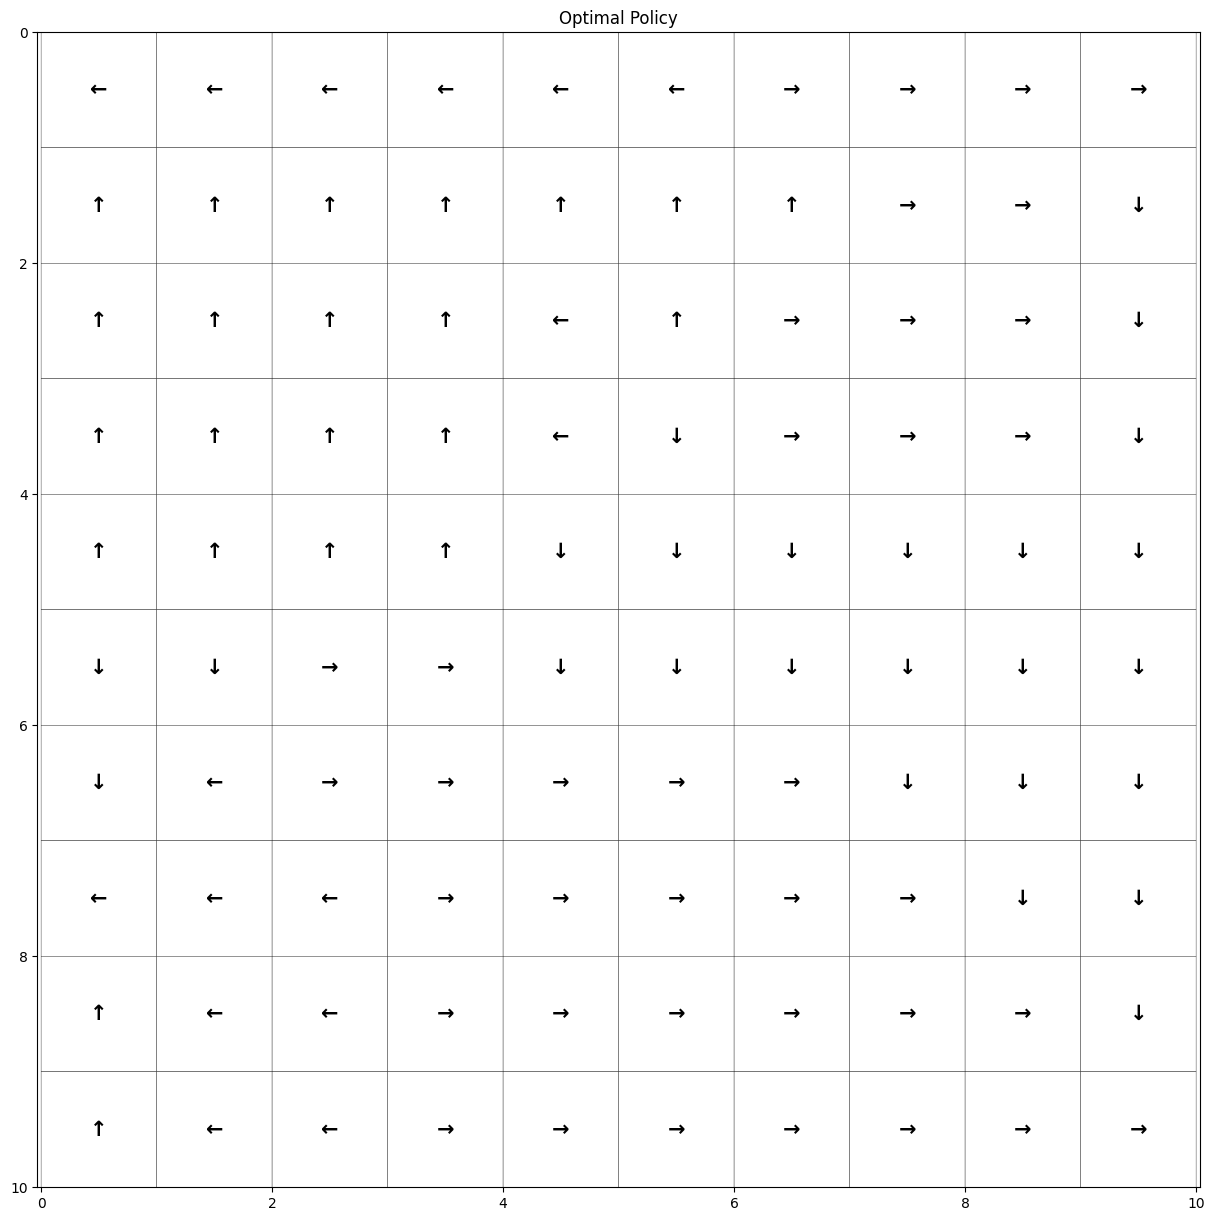

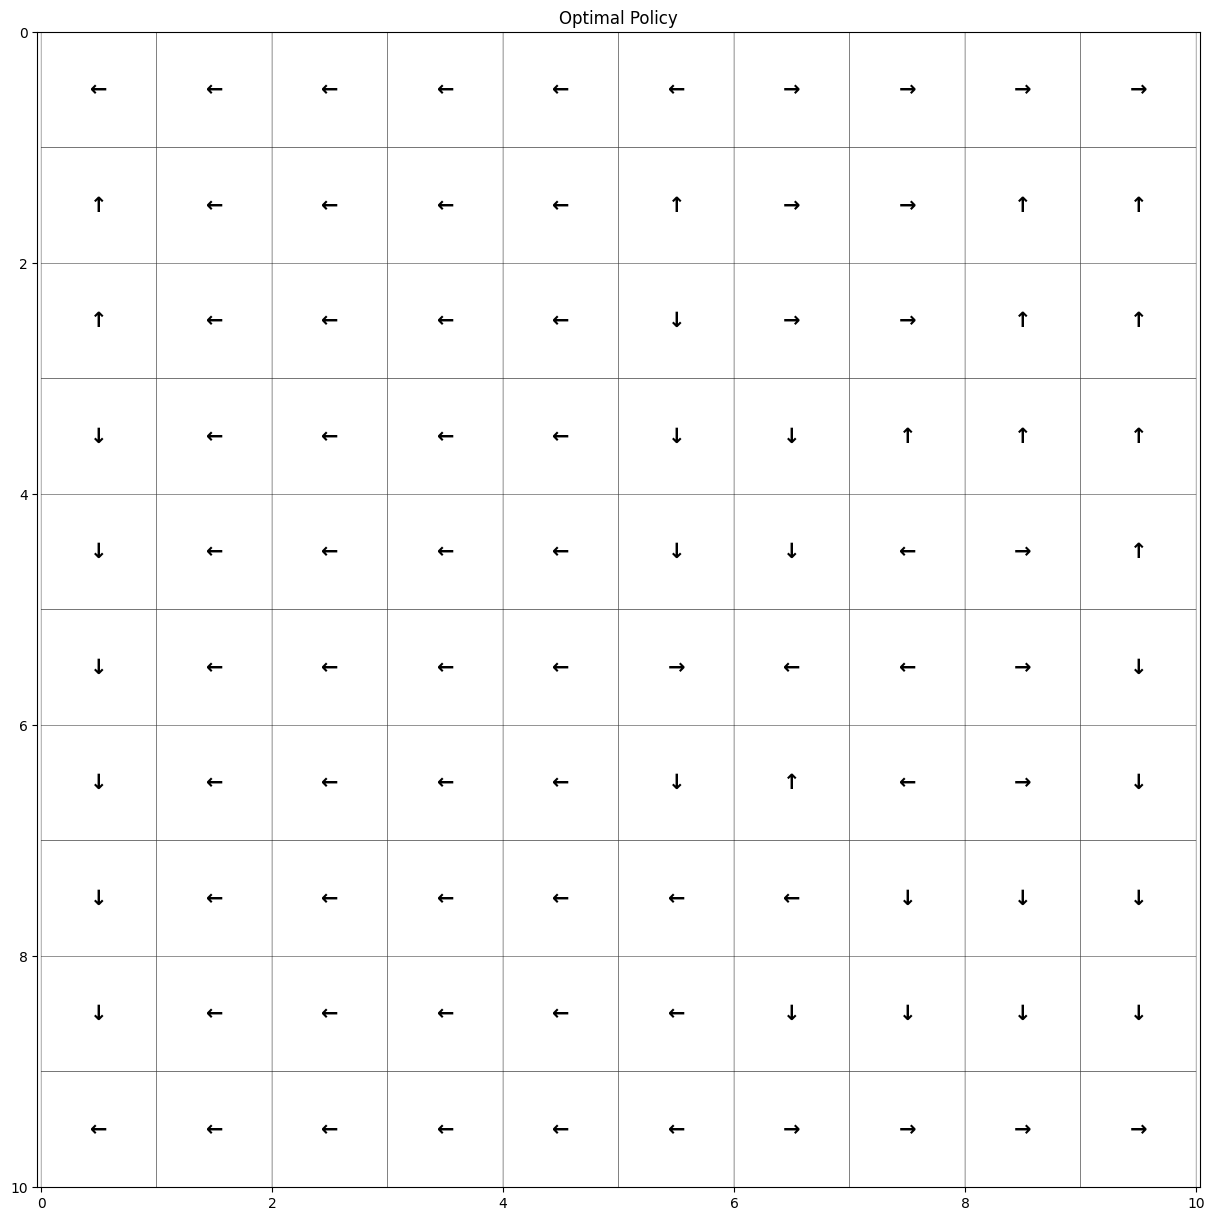

In [10]:
#Changing to w = .6

#Reward Function 1

#Parameters
num_states=100
gamma=0.8
w=0.6
epsilon=0.01
reward_function = reward_1
P_matrix,_,_,_,_ = transition_probability(w)

#Computing Policy
policy=get_policy(num_states,P_matrix,reward_function,epsilon,gamma)
optimal_policy=np.transpose(policy.reshape(10,10))

#Plotting Policy
arrow_matrix=np.chararray((optimal_policy.shape[0], optimal_policy.shape[1]),unicode=True)
for r in range(optimal_policy.shape[0]):
    for c in range(optimal_policy.shape[1]):
        # If policy says go left
        if optimal_policy[r][c] == 0:
            arrow_matrix[r][c] = u'\u2190'
        # If policy says go right
        elif optimal_policy[r][c] == 1:
            arrow_matrix[r][c] = u'\u2192'
        # If policy says go up
        elif optimal_policy[r][c] == 2:
            arrow_matrix[r][c] =u'\u2191'
        # If policy says go down
        elif optimal_policy[r][c] == 3:
            arrow_matrix[r][c] = u'\u2193'
    
plt.figure(figsize=(15,15))
plt.pcolor(optimal_policy, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy")
for y in range(optimal_policy.shape[0]):
    for x in range(optimal_policy.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.show()

#Reward Function 2

#Parameters
num_states=100
gamma=0.8
w=0.6
epsilon=0.01
reward_function = reward_2
P_matrix,_,_,_,_ = transition_probability(w)

#Optimal Policy
policy=get_policy(num_states,P_matrix,reward_function,epsilon,gamma)
optimal_policy=np.transpose(policy.reshape(10,10))

#Plotting Policy
arrow_matrix=np.chararray((optimal_policy.shape[0], optimal_policy.shape[1]),unicode=True)
for r in range(optimal_policy.shape[0]):
    for c in range(optimal_policy.shape[1]):
        # If policy says go left
        if optimal_policy[r][c] == 0:
            arrow_matrix[r][c] = u'\u2190'
        # If policy says go right
        elif optimal_policy[r][c] == 1:
            arrow_matrix[r][c] = u'\u2192'
        # If policy says go up
        elif optimal_policy[r][c] == 2:
            arrow_matrix[r][c] =u'\u2191'
        # If policy says go down
        elif optimal_policy[r][c] == 3:
            arrow_matrix[r][c] = u'\u2193'
    
plt.figure(figsize=(15,15))
plt.pcolor(optimal_policy, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy")
for y in range(optimal_policy.shape[0]):
    for x in range(optimal_policy.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.show()

In [11]:
# Reward Function 1

num_states=100
gamma=0.8
epsilon=0.01
reward_function = reward_1
P_matrix_1,_,_,_,_ = transition_probability(w=0.1)
P_matrix_2,_,_,_,_ = transition_probability(w=0.6)

#Values
V_1,_,_,_,_=get_inter_value(num_states,P_matrix_1,reward_function,epsilon,gamma)
optimal_V_1=np.transpose(V_1.reshape(10,10))

V_2,_,_,_,_=get_inter_value(num_states,P_matrix_2,reward_function,epsilon,gamma)
optimal_V_2=np.transpose(V_2.reshape(10,10))

#Comparing
count=0
for i in range(optimal_V_1.shape[0]):
        for j in range(optimal_V_1.shape[1]):
            if optimal_V_2[i][j]<=optimal_V_1[i][j]:
                count=count+1
print(count)


# Reward Function 2

num_states=100
gamma=0.8
epsilon=0.01
reward_function = reward_2
P_matrix_1,_,_,_,_ = transition_probability(w=0.1)
P_matrix_2,_,_,_,_ = transition_probability(w=0.6)

#Values
V_1,_,_,_,_=get_inter_value(num_states,P_matrix_1,reward_function,epsilon,gamma)
optimal_V_1=np.transpose(V_1.reshape(10,10))

V_2,_,_,_,_=get_inter_value(num_states,P_matrix_2,reward_function,epsilon,gamma)
optimal_V_2=np.transpose(V_2.reshape(10,10))

#Comparing
count=0
for i in range(optimal_V_1.shape[0]):
        for j in range(optimal_V_1.shape[1]):
            if optimal_V_2[i][j]<=optimal_V_1[i][j]:
                count=count+1

Number of steps for convergence:  22
Number of intermediate steps captured:  5
Number of steps for convergence:  19
Number of intermediate steps captured:  4
100
Number of steps for convergence:  32
Number of intermediate steps captured:  8
Number of steps for convergence:  27
Number of intermediate steps captured:  6


w = .1 is better because it generates higher values in all cells. I think the best w is to have w as low as possible. I'll choose w = .1

### Question 11

In [12]:
# def getcDbMatrices(arrows_expert,P_ss,ind,gamma,lambda_val,maximum):
#     I = np.identity(100)
#     mat1 = np.zeros((300,100))
#     iden_mat = np.zeros((300,100))
#     i=0
#     for s in range(100):
#         opt = int(arrows_expert[ind][s])
#         for action in range(len(P_ss)):
#             if(opt==action):
#                 continue
#             pa1 = P_ss[opt]
#             pa = P_ss[action]
#             mat1[i,:] = np.matmul((pa1[s]-pa[s]).reshape(1,100), np.linalg.inv(I-gamma*pa1))
#             iden_mat[i,s] = 1
#             i=i+1
#     mat1 = -mat1
#     R = np.vstack((mat1, mat1,-I, I, I, -I))
#     t = np.vstack((iden_mat, np.zeros((700,100))))
#     u = np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))
#     D = np.hstack((R,t,u))
#     ones = np.zeros((100,1))+1
#     c = np.vstack((np.zeros((100,1)), ones, -lambda_val*ones))
#     b = np.zeros((800,1))
#     Rmax = np.zeros((100,1))+maximum[ind]
#     b = np.vstack((b, Rmax, Rmax))
#     return c,D,b
def compute_matrices(expert_arrows, transition_probs, index, discount, regularization, max_val):
    identity_matrix = np.identity(100)
    matrix1 = np.zeros((300, 100))
    indicator_matrix = np.zeros((300, 100))
    counter = 0

    for state in range(100):
        optimal_action = int(expert_arrows[index][state])
        for action in range(len(transition_probs)):
            if optimal_action == action:
                continue
            optimal_prob = transition_probs[optimal_action]
            action_prob = transition_probs[action]
            matrix1[counter, :] = np.matmul((optimal_prob[state] - action_prob[state]).reshape(1, 100), np.linalg.inv(identity_matrix - discount * optimal_prob))
            indicator_matrix[counter, state] = 1
            counter += 1

    matrix1 = -matrix1
    R = np.vstack((matrix1, matrix1, -identity_matrix, identity_matrix, identity_matrix, -identity_matrix))
    zero_block = np.zeros((700, 100))
    identity_block = np.zeros((600, 100))
    stacked_indicator = np.vstack((indicator_matrix, zero_block))
    stacked_identity = np.vstack((identity_block, -identity_matrix, -identity_matrix, np.zeros((200, 100))))
    D = np.hstack((R, stacked_indicator, stacked_identity))
    ones_vector = np.ones((100, 1))
    c = np.vstack((np.zeros((100, 1)), ones_vector, -regularization * ones_vector))
    constraint_vector = np.zeros((800, 1))
    max_constraint = np.zeros((100, 1)) + max_val[index]
    b = np.vstack((constraint_vector, max_constraint, max_constraint))

    return c, D, b


In [13]:
gamma=0.8
w=0.1
epsilon=0.01
P_matrix,_,_,_,_ = transition_probability(w)

# policies for reward function 1
arrows1 = get_policy(num_states, P_matrix, reward_1, epsilon, gamma)
# policies for reward function 2
arrows2 = get_policy(num_states, P_matrix, reward_2, epsilon, gamma)
arrows_expert = [np.transpose(arrows1).flatten(), np.transpose(arrows2).flatten()]

In [14]:
lambdas = np.arange(0,5.01,0.01)
maximum = [1,10]
acc_list_list = []
I = np.identity(100)
ind = 0   
while(ind<2):
    acc_list = []
    for i,lambda_val in enumerate(tqdm(lambdas)):
        
        #Extract reward func tion
        c,D,b = compute_matrices(arrows_expert,P_matrix,ind,gamma,lambda_val,maximum)
        solvers.options['show_progress']=False
        sol = solvers.lp(matrix(c),matrix(D),matrix(b))
        R = np.array(sol['x'][:100])
        
        arrows_agent = get_policy(num_states, P_matrix, R, epsilon, gamma)
        
        #Performance measure
        acc=0
        for j in range(len(np.transpose(arrows_agent).flatten())):
            if(np.transpose(arrows_agent).flatten()[j]==arrows_expert[ind][j]):
                acc = acc+1
        acc = acc/100.0
        
        acc_list.append(acc)
    acc_list_list.append(acc_list)
    ind = ind+1

100%|█████████████████████████████████████████████████████████████████████████████████| 501/501 [01:44<00:00,  4.81it/s]


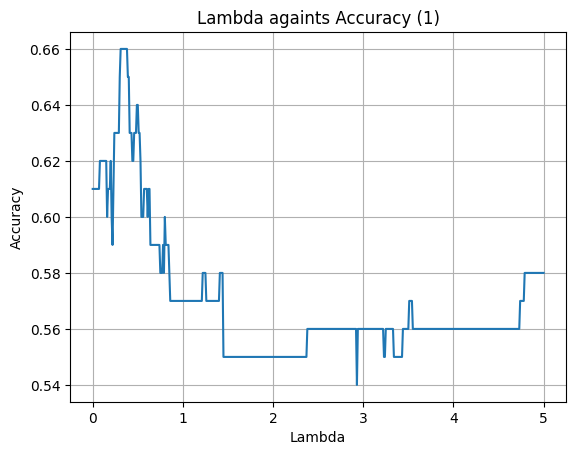

In [15]:
plt.plot(lambdas,acc_list_list[0])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Lambda againts Accuracy (1)")
plt.grid()
plt.savefig('Q11.png',dpi=300,bbox_inches='tight')
plt.show()

### Question 12

In [16]:
print("Max value of accuracy:",acc_list_list[0][np.argmax(acc_list_list[0])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[0])])

Max value of accuracy: 0.66
Corresponding value of lambda: 0.31


### Question 13

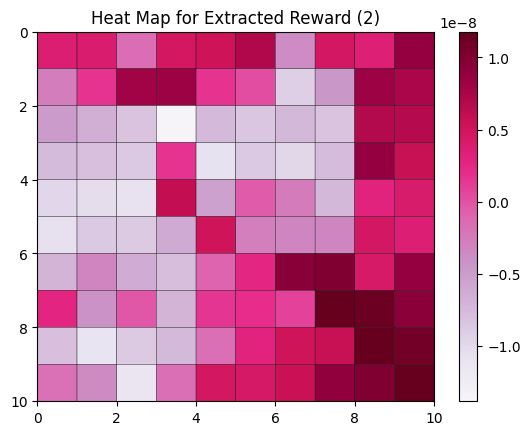

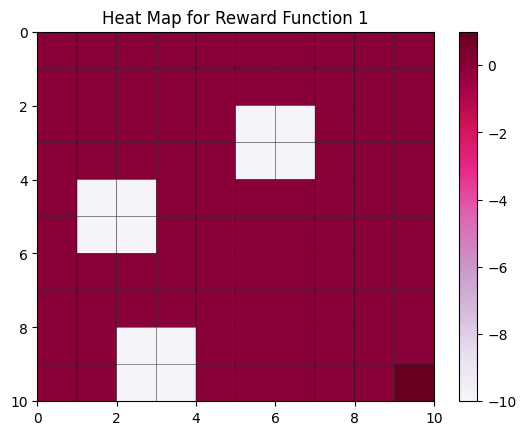

In [18]:
c,D,b = compute_matrices(arrows_expert,P_matrix,0,gamma,0.31,maximum)
solvers.options['show_progress'] = False
sol = solvers.lp(matrix(c), matrix(D), matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))

plt.pcolor(R, cmap = "PuRd",edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Extracted Reward (2)")
plt.savefig('Q13a.png',dpi=300,bbox_inches='tight')
plt.show()

plt.pcolor(reward_1, cmap = "PuRd",edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 1")
plt.savefig('Q13b.png',dpi=300,bbox_inches='tight')
plt.show()

### Question 14

Number of steps for convergence:  1
Number of intermediate steps captured:  0


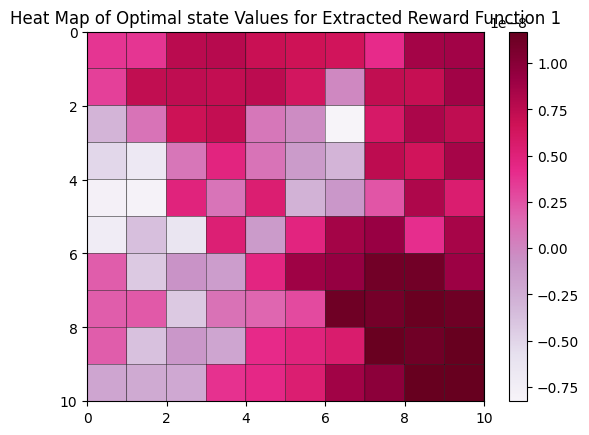

In [19]:
V_extracted,_,_,_,_ = get_inter_value(num_states,P_matrix,R,epsilon,gamma)
V_extracted = np.transpose(V_extracted.reshape(10,10))
plt.pcolor(V_extracted,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal state Values for Extracted Reward Function 1")
plt.savefig('Q14.png',dpi=300,bbox_inches='tight')
plt.show()

### Question 16

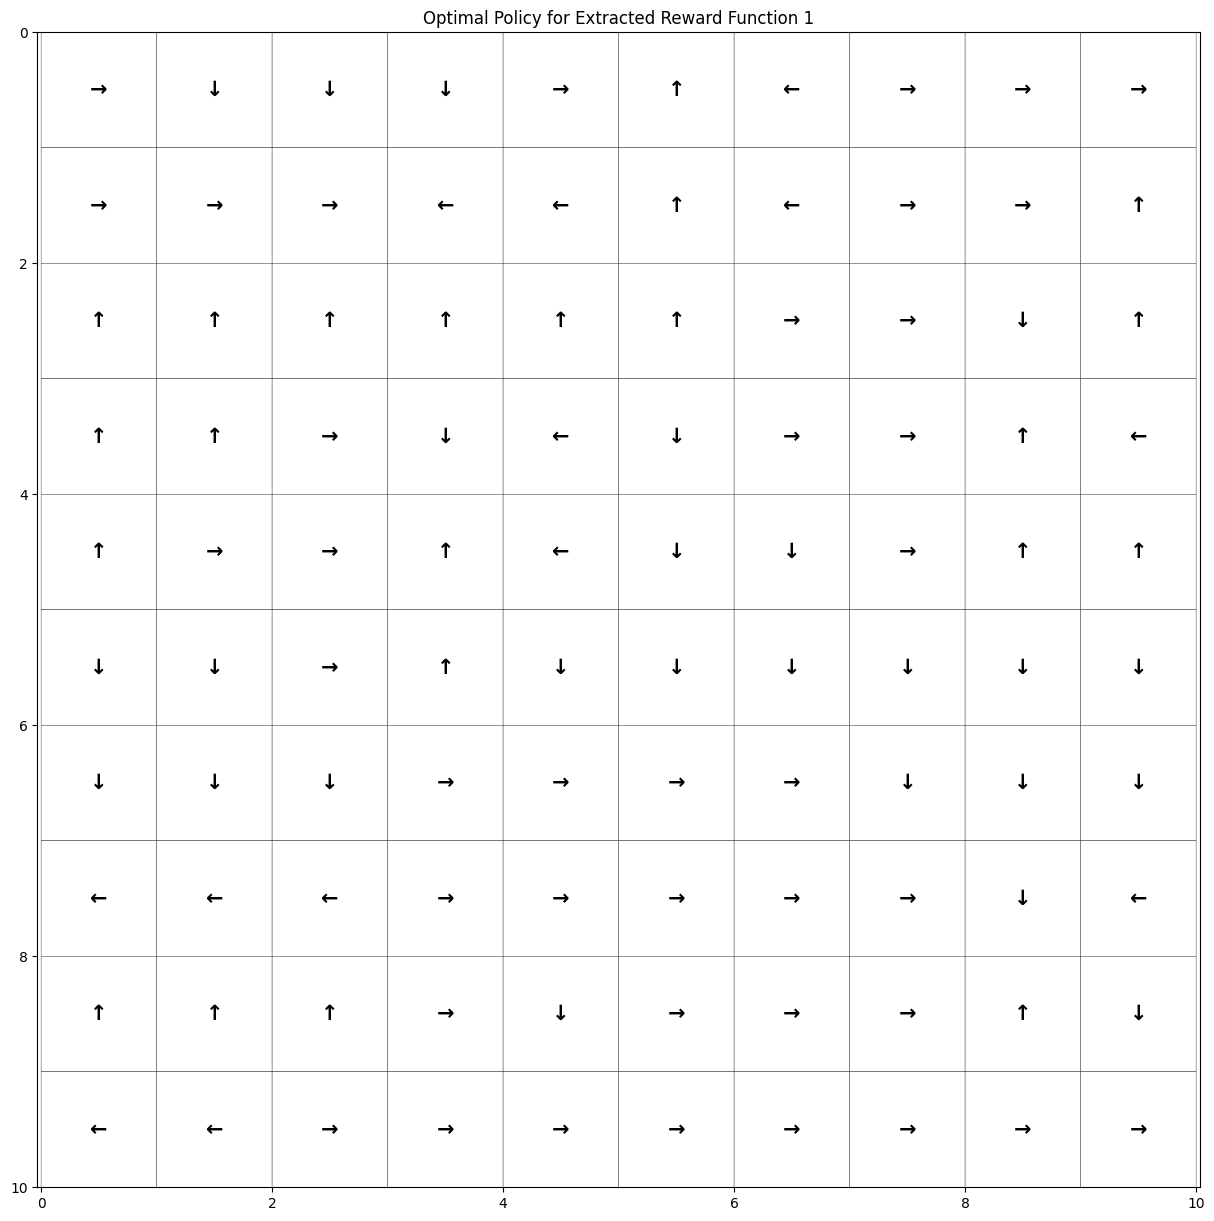

In [20]:
policy = get_policy(num_states, P_matrix, R, epsilon, gamma)
optimal_policy = np.transpose(policy.reshape(10,10))
#Plotting Policy
arrow_matrix=np.chararray((optimal_policy.shape[0], optimal_policy.shape[1]),unicode=True)
for r in range(optimal_policy.shape[0]):
    for c in range(optimal_policy.shape[1]):
        # If policy says go left
        if optimal_policy[r][c] == 0:
            arrow_matrix[r][c] = u'\u2190'
        # If policy says go right
        elif optimal_policy[r][c] == 1:
            arrow_matrix[r][c] = u'\u2192'
        # If policy says go up
        elif optimal_policy[r][c] == 2:
            arrow_matrix[r][c] =u'\u2191'
        # If policy says go down
        elif optimal_policy[r][c] == 3:
            arrow_matrix[r][c] = u'\u2193'
    
plt.figure(figsize=(15,15))
plt.pcolor(optimal_policy, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy for Extracted Reward Function 1")
for y in range(optimal_policy.shape[0]):
    for x in range(optimal_policy.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.savefig('Q16.png',dpi=300,bbox_inches='tight')
plt.show()

### Question 18

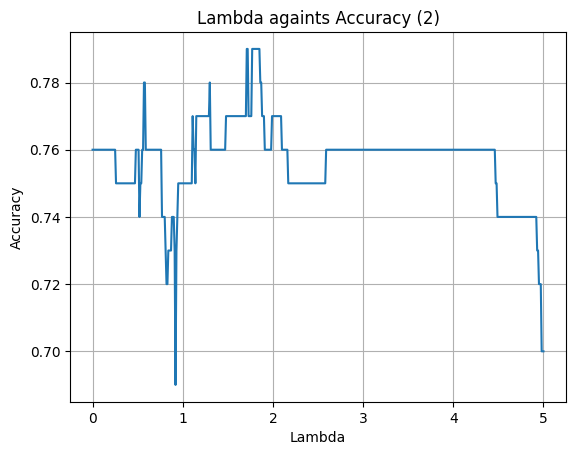

In [21]:
plt.plot(lambdas,acc_list_list[1])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Lambda againts Accuracy (2)")
plt.grid()
plt.savefig('Q18.png',dpi=300,bbox_inches='tight')
plt.show()

### Question 19

In [22]:
print("Max value of accuracy:",acc_list_list[1][np.argmax(acc_list_list[1])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[1])])

Max value of accuracy: 0.79
Corresponding value of lambda: 1.71


### Question 20

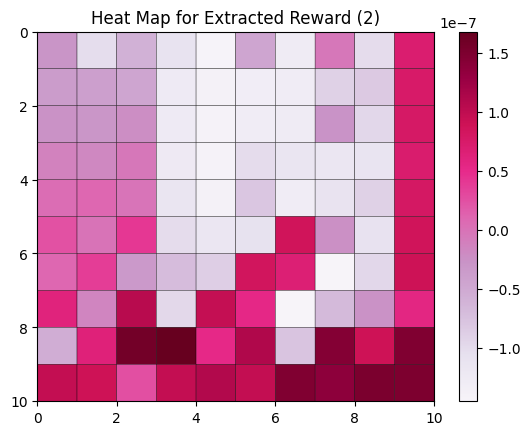

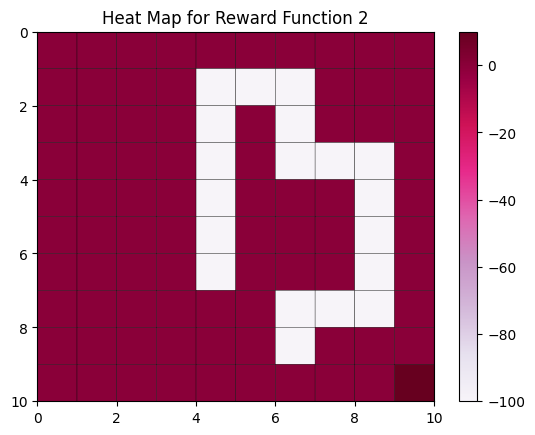

In [23]:
c,D,b = compute_matrices(arrows_expert,P_matrix,1,gamma,1.71,maximum)
solvers.options['show_progress']=False
sol = solvers.lp(matrix(c),matrix(D),matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))


plt.pcolor(R,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Extracted Reward (2)")
plt.savefig('Q20a.png',dpi=300,bbox_inches='tight')
plt.show()

plt.pcolor(reward_2,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map for Reward Function 2")
plt.savefig('Q20b.png',dpi=300,bbox_inches='tight')
plt.show()

### Question 21

Number of steps for convergence:  1
Number of intermediate steps captured:  0


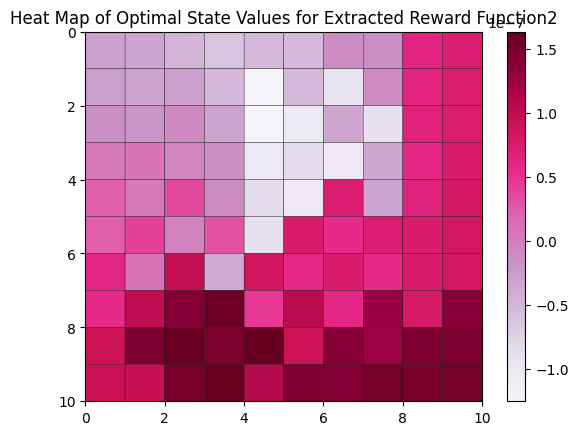

In [24]:
V_extracted,_,_,_,_= get_inter_value(num_states,P_matrix,R,epsilon,gamma)
V_extracted = np.transpose(V_extracted.reshape(10,10))
plt.pcolor(V_extracted,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Values for Extracted Reward Function2")
plt.savefig('Q21.png',dpi=300,bbox_inches='tight')
plt.show()

### Question 23

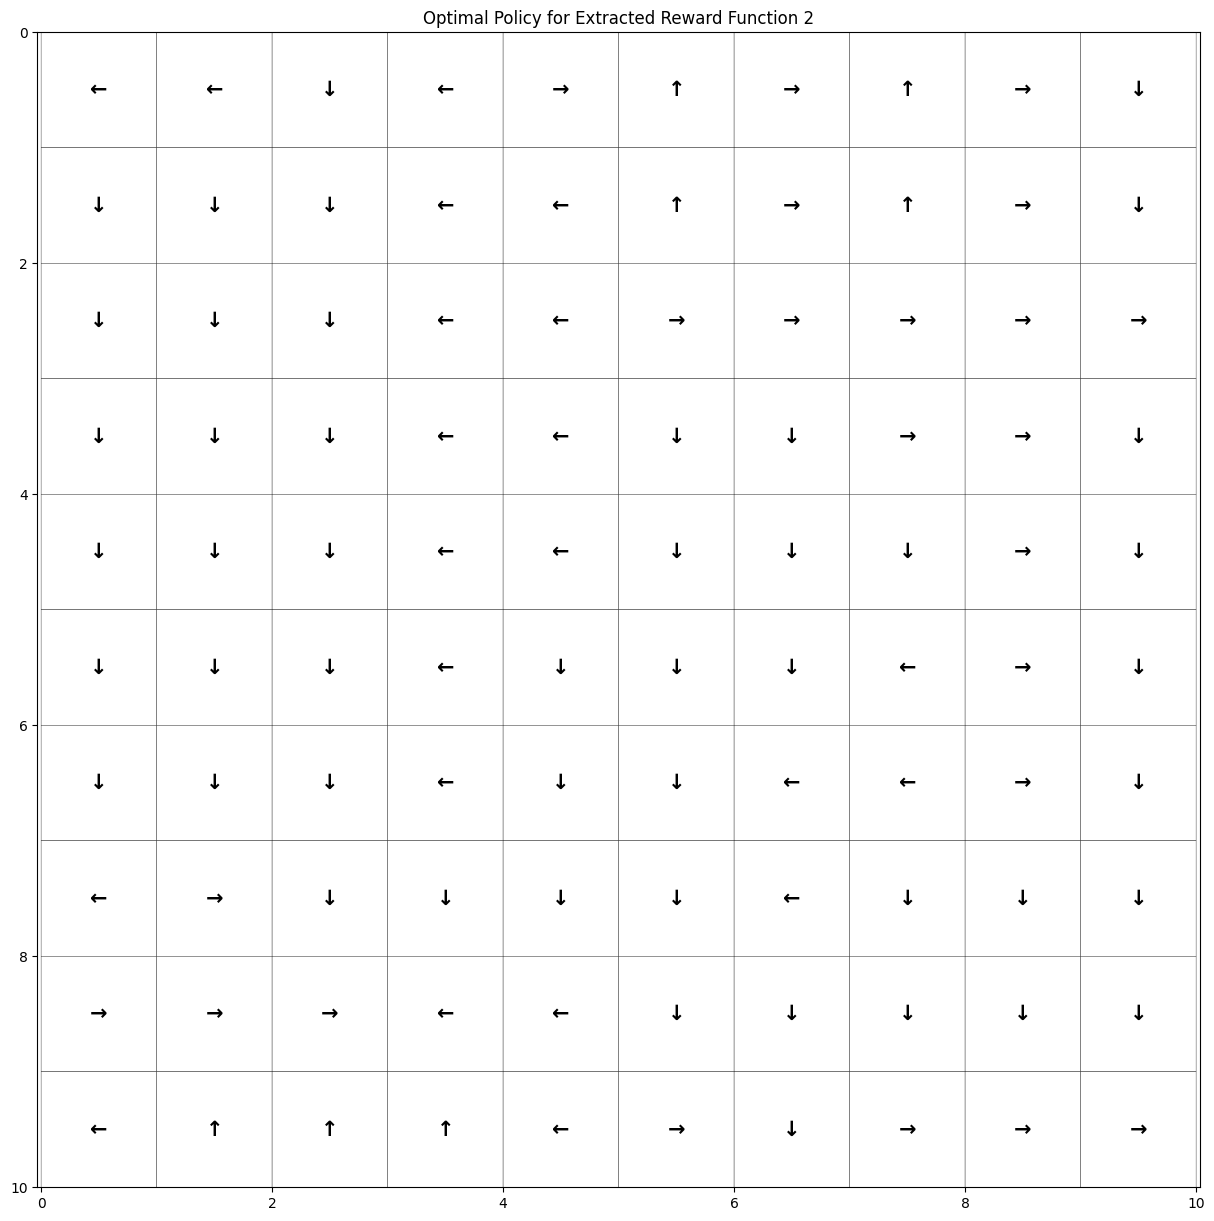

In [25]:
policy = get_policy(num_states, P_matrix, R, epsilon, gamma)
optimal_policy = np.transpose(policy.reshape(10,10))

#Plotting Policy
arrow_matrix=np.chararray((optimal_policy.shape[0], optimal_policy.shape[1]),unicode=True)
for r in range(optimal_policy.shape[0]):
    for c in range(optimal_policy.shape[1]):
        # If policy says go left
        if optimal_policy[r][c] == 0:
            arrow_matrix[r][c] = u'\u2190'
        # If policy says go right
        elif optimal_policy[r][c] == 1:
            arrow_matrix[r][c] = u'\u2192'
        # If policy says go up
        elif optimal_policy[r][c] == 2:
            arrow_matrix[r][c] =u'\u2191'
        # If policy says go down
        elif optimal_policy[r][c] == 3:
            arrow_matrix[r][c] = u'\u2193'
    
plt.figure(figsize=(15,15))
plt.pcolor(optimal_policy, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy for Extracted Reward Function 2")
for y in range(optimal_policy.shape[0]):
    for x in range(optimal_policy.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.savefig('Q23.png',dpi=300,bbox_inches='tight')
plt.show()

### Questino 25

In [26]:
def get_policy_Q25(num_states, weights, discount, reward, tol, prob_up, prob_down, prob_left, prob_right):
    values = np.zeros(100)
    delta = np.inf
    policy = np.zeros(100)
    directions = np.zeros(100)
    reshaped_reward = (reward.T).ravel()
    
    while delta > tol:
        delta = 0
        old_values = np.copy(values)
        for state in range(num_states):
            val_up = np.sum(prob_up[state] * (reshaped_reward + discount * old_values))
            val_down = np.sum(prob_down[state] * (reshaped_reward + discount * old_values))
            val_left = np.sum(prob_left[state] * (reshaped_reward + discount * old_values))
            val_right = np.sum(prob_right[state] * (reshaped_reward + discount * old_values))
            values[state] = max(val_up, val_down, val_left, val_right)
            delta = max(delta, abs(old_values[state] - values[state]))
    
    for state in range(num_states):
        val_up = np.sum(prob_up[state] * (reshaped_reward + discount * values))
        val_down = np.sum(prob_down[state] * (reshaped_reward + discount * values))
        val_left = np.sum(prob_left[state] * (reshaped_reward + discount * values))
        val_right = np.sum(prob_right[state] * (reshaped_reward + discount * values))
        
        # Set state values of edge/corner states to -infinity
        if state != 99:
            if state % 10 == 0:
                val_up = -np.inf
            if state % 10 == 9:
                val_down = -np.inf
            if state <= 9:
                val_left = -np.inf
            if state >= 90:
                val_right = -np.inf
        
        action_values = [val_up, val_down, val_left, val_right]
        policy[state] = np.amax(action_values)
        directions[state] = action_values.index(np.amax(action_values))
    
    directions = np.transpose(directions.reshape(10, 10))
    policy = np.transpose(policy.reshape(10, 10))
    arrow_grid = np.chararray((10, 10), unicode=True)
    
    for i in range(10):
        for j in range(10):
            if directions[j][i] == 0:
                arrow_grid[j][i] = u'\u2191'
            elif directions[j][i] == 1:
                arrow_grid[j][i] = u'\u2193'
            elif directions[j][i] == 2:
                arrow_grid[j][i] = u'\u2190'
            elif directions[j][i] == 3:
                arrow_grid[j][i] = u'\u2192'
    
    return policy, arrow_grid, directions


In [27]:
num_states = 100
w = 0.1
gamma = 0.8
epsilon = pow(10,-10)
P_matrix,tp_u,tp_d,tp_l,tp_r = transition_probability(w)

policy_1 = get_policy(num_states, P_matrix, reward_1, epsilon, gamma)
policy_2 = get_policy(num_states, P_matrix, reward_2, epsilon, gamma)

arrows_expert = [np.transpose(policy_1).flatten(), np.transpose(policy_2).flatten()]

In [28]:
lambdas = np.arange(0,5.01,0.01)
maximum = [1,10]
acc_list_list = []
I = np.identity(100)
ind = 0   
while(ind<2):
    acc_list = []
    for i,lambda_val in enumerate(tqdm(lambdas)):
        
        #Extract reward function
        c,D,b = compute_matrices(arrows_expert,P_matrix,ind,gamma,lambda_val,maximum)
        solvers.options['show_progress']=False
        sol = solvers.lp(matrix(c),matrix(D),matrix(b))
        R = np.array(sol['x'][:100])
        
        #Extract agent's policy from extracted reward function
        policy, arrow_grid, directions = get_policy_Q25(num_states,w,gamma,
                                                                     R,epsilon,tp_u, tp_d, tp_l, tp_r)    
        
        #Performance measure
        acc=0
        for j in range(len(np.transpose(arrows_agent).flatten())):
            if(np.transpose(directions).flatten()[j]==arrows_expert[ind][j]):
                acc = acc+1
        acc = acc/100.0
        
        acc_list.append(acc)
    acc_list_list.append(acc_list)
    ind = ind+1

100%|█████████████████████████████████████████████████████████████████████████████████| 501/501 [02:04<00:00,  4.02it/s]


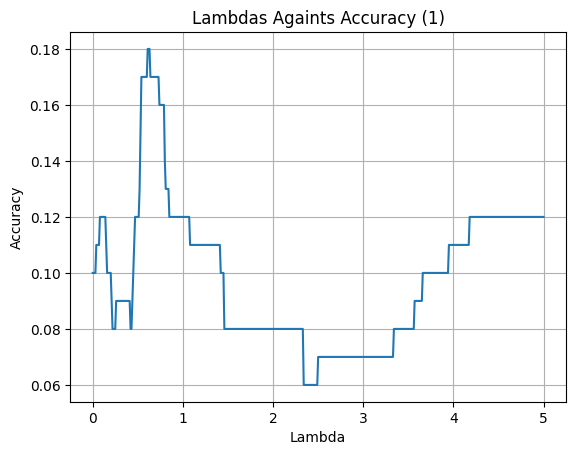

In [29]:
plt.plot(lambdas,acc_list_list[0])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Lambdas Againts Accuracy (1)")
plt.grid()
plt.savefig('Q25a.png',dpi=300,bbox_inches='tight')
plt.show()

In [30]:
print("Max value of accuracy:",acc_list_list[0][np.argmax(acc_list_list[0])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[0])])

Max value of accuracy: 0.18
Corresponding value of lambda: 0.61


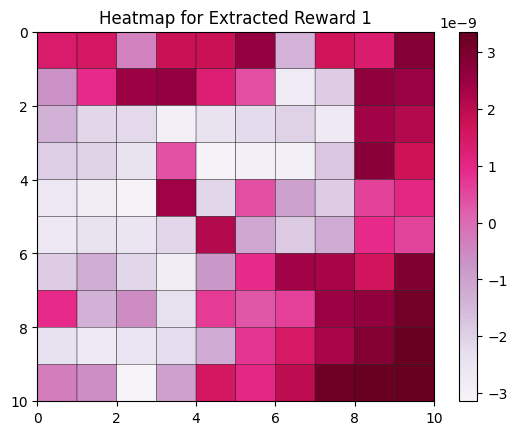

In [31]:
c,D,b = compute_matrices(arrows_expert,P_matrix,0,gamma,0.61,maximum)
solvers.options['show_progress']=False
sol = solvers.lp(matrix(c),matrix(D),matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))

# plt.pcolor(R,cmap='PuRd',edgecolors='black')
plt.pcolor(R,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for Extracted Reward 1")
plt.savefig('Q25b.png',dpi=300,bbox_inches='tight')
plt.show()

Number of steps for convergence:  17
Number of intermediate steps captured:  4


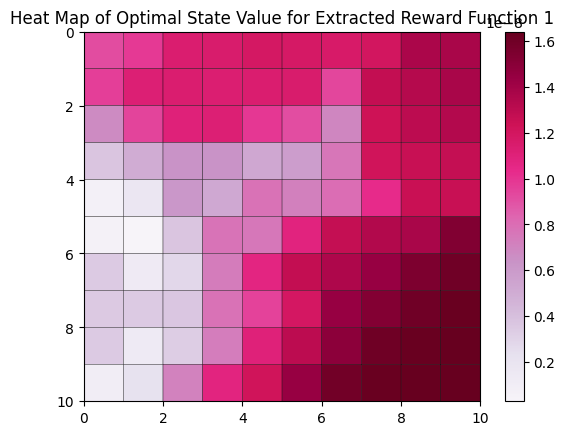

In [32]:
V_extracted,_,_,_,_=get_inter_value(num_states, P_matrix, R, epsilon, gamma)
V_extracted = np.transpose(V_extracted.reshape(10,10))
plt.pcolor(V_extracted,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Value for Extracted Reward Function 1")
plt.savefig('Q25c.png',dpi=300,bbox_inches='tight')
plt.show()

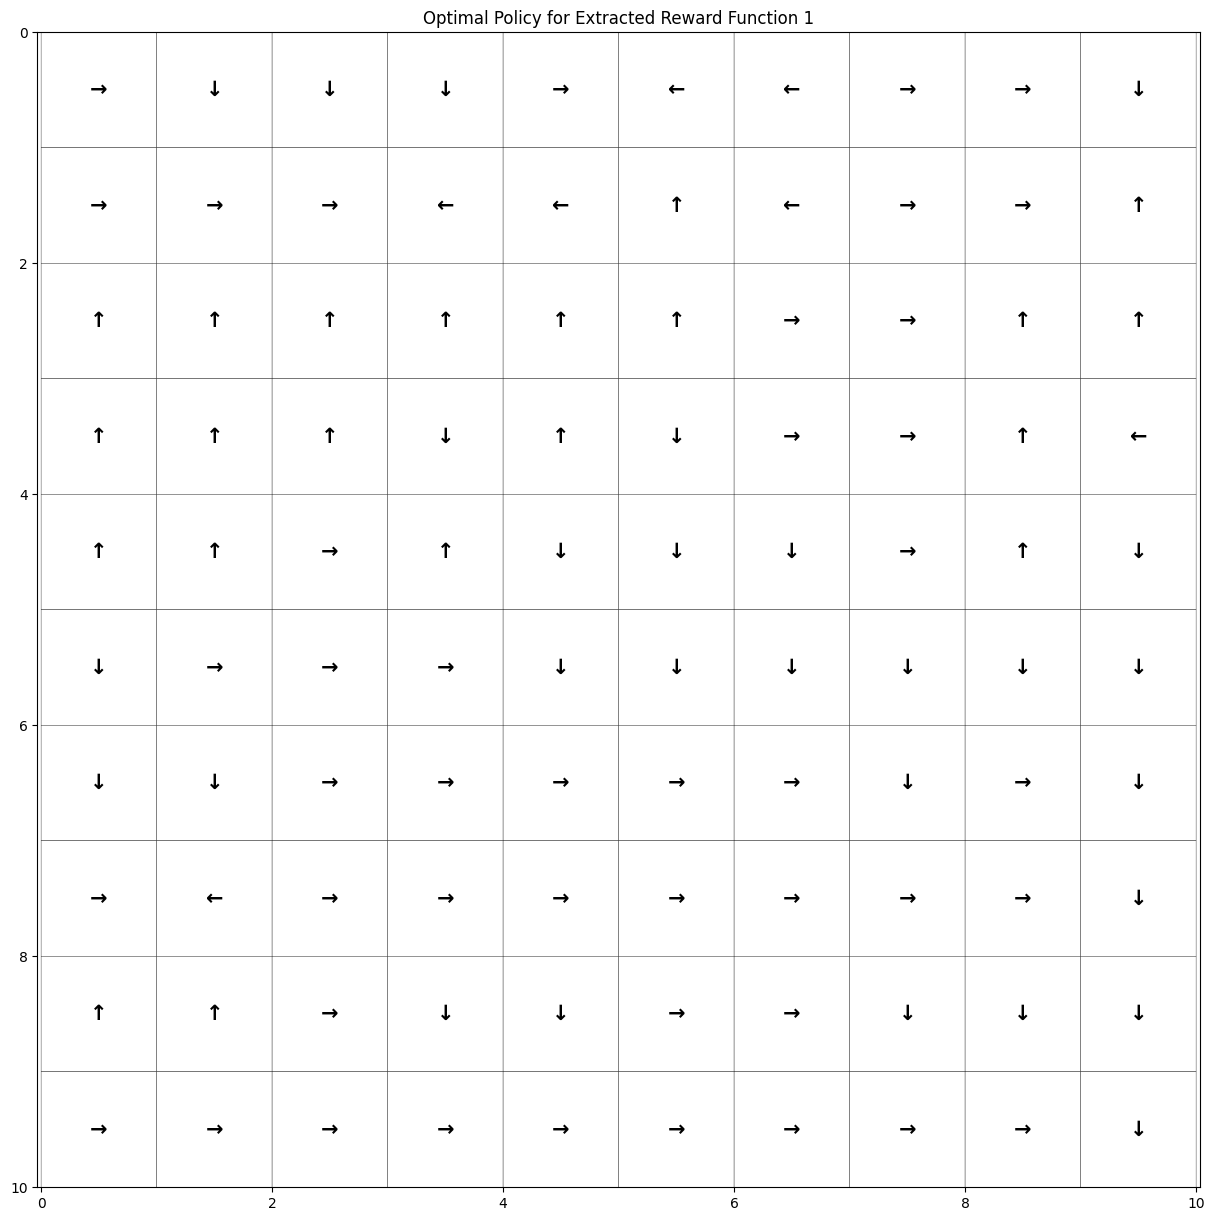

In [33]:
policy, arrow_grid, directions = get_policy_Q25(num_states,w,gamma,
                                                              R,epsilon,tp_u, tp_d, tp_l, tp_r)   
arrow_matrix = np.chararray((10, 10), unicode=True)
arrow_matrix[:] = arrow_grid
plt.figure(figsize=(15,15))
plt.pcolor(directions, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy for Extracted Reward Function 1")
for y in range(directions.shape[0]):
    for x in range(directions.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.savefig('Q25d.png',dpi=300,bbox_inches='tight')
plt.show()

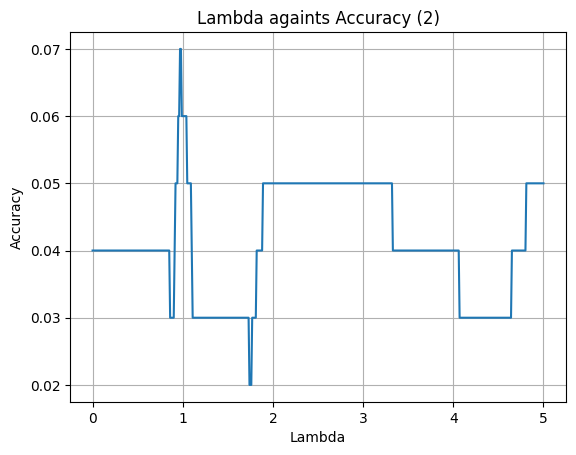

In [34]:
plt.plot(lambdas,acc_list_list[1])
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Lambda againts Accuracy (2)")
plt.grid()
plt.savefig('Q25e.png',dpi=300,bbox_inches='tight')
plt.show()

In [35]:
print("Max value of accuracy:",acc_list_list[1][np.argmax(acc_list_list[1])])
print("Corresponding value of lambda:",lambdas[np.argmax(acc_list_list[1])])

Max value of accuracy: 0.07
Corresponding value of lambda: 0.97


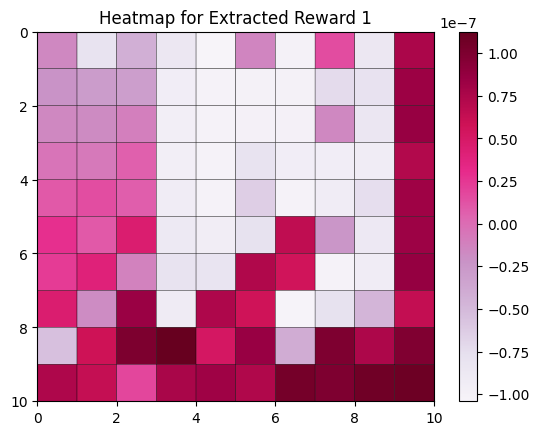

In [36]:
c,D,b = compute_matrices(arrows_expert,P_matrix,1,gamma,0.97,maximum)
solvers.options['show_progress']=False
sol = solvers.lp(matrix(c),matrix(D),matrix(b))
R = np.array(sol['x'][:100])
R = np.transpose(R.reshape(10,10))

plt.pcolor(R,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap for Extracted Reward 1")
plt.savefig('Q25f.png',dpi=300,bbox_inches='tight')
plt.show()

Number of steps for convergence:  33
Number of intermediate steps captured:  8


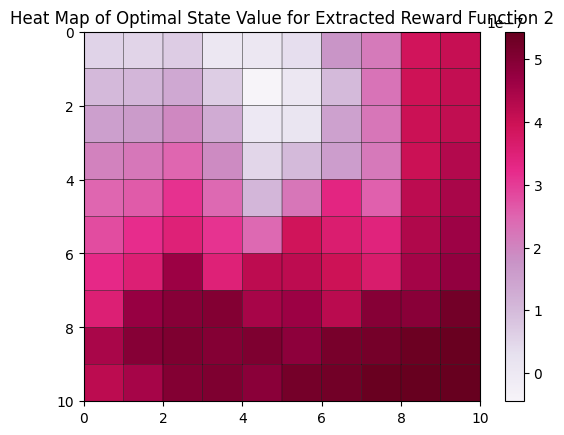

In [37]:
V_extracted,_,_,_,_=get_inter_value(num_states, P_matrix, R, epsilon, gamma)
V_extracted = np.transpose(V_extracted.reshape(10,10))
plt.pcolor(V_extracted,cmap='PuRd',edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heat Map of Optimal State Value for Extracted Reward Function 2")
plt.savefig('Q25g.png',dpi=300,bbox_inches='tight')
plt.show()

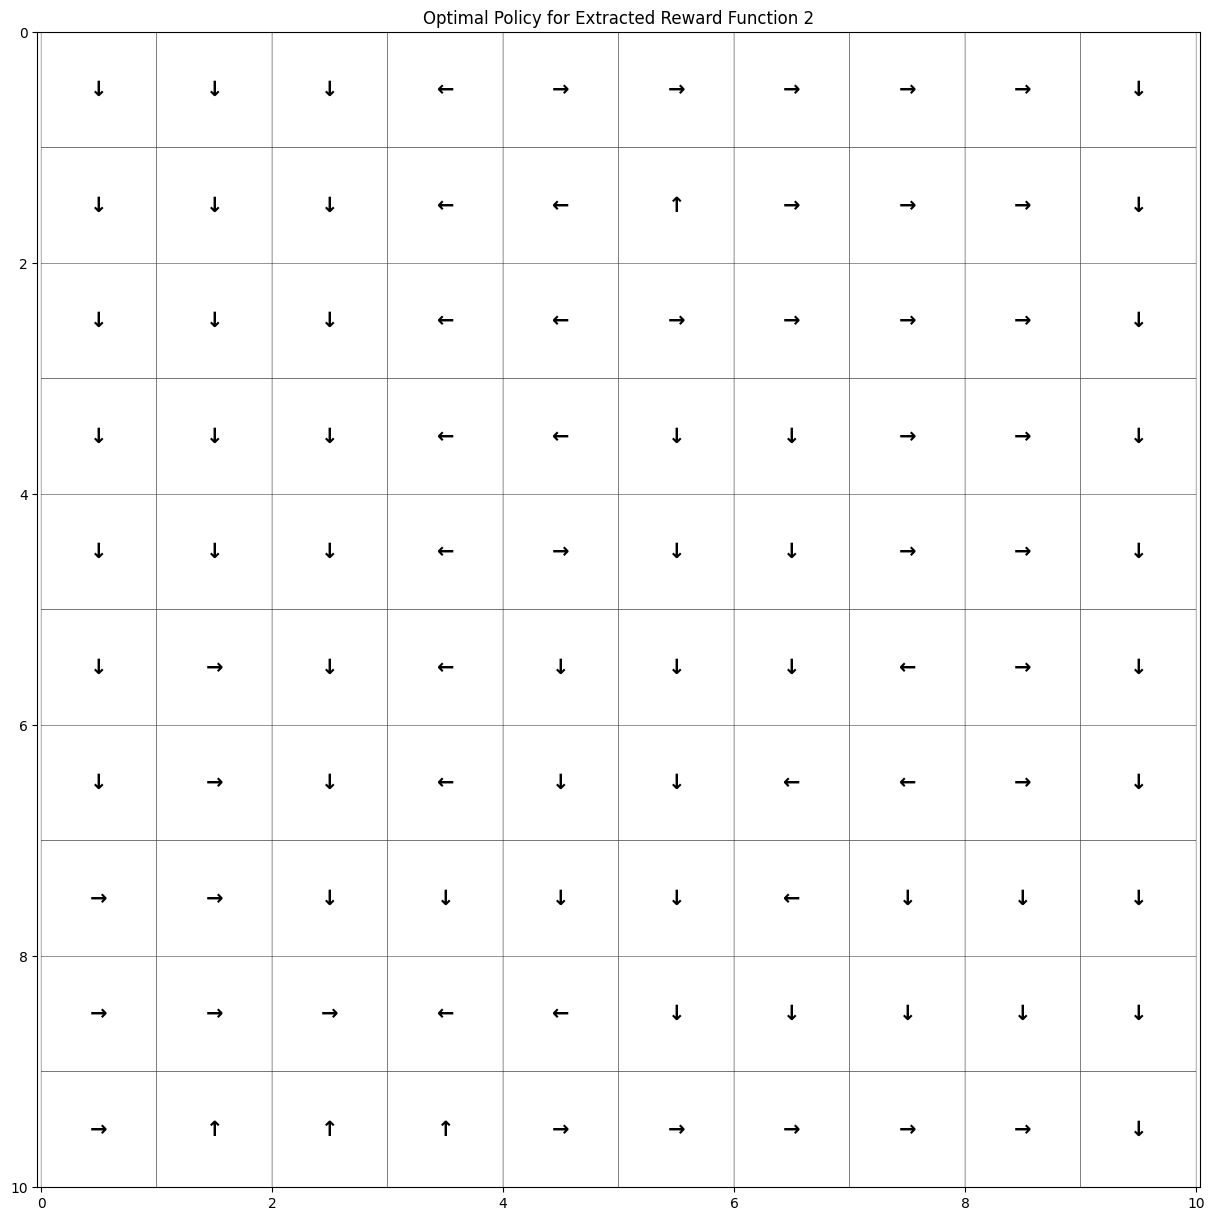

In [38]:
policy, arrow_grid, directionst = get_policy_Q25(num_states,w,gamma,R,epsilon,tp_u, tp_d, tp_l, tp_r)   
# 
arrow_matrix = np.chararray((10, 10), unicode=True)
arrow_matrix[:] = arrow_grid
plt.figure(figsize=(15,15))
plt.pcolor(directions, cmap=ListedColormap(['white']), edgecolors='black')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.title("Optimal Policy for Extracted Reward Function 2")
for y in range(directions.shape[0]):
    for x in range(directions.shape[1]):
        plt.text(x + 0.5, y + 0.5, arrow_matrix[y,x],
            horizontalalignment='center',
            verticalalignment='center',fontsize=15,weight="bold")
plt.savefig('Q25h.png',dpi=300,bbox_inches='tight')
plt.show()